# Credit Card EDA Case Study

Business Objectives:

This case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

 
In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

To develop your understanding of the domain, you are advised to independently research a little about risk analytics - understanding the types of variables and their significance should be enough).

Data Understanding:
    
This dataset has 3 files as explained below: 

 

1. 'application_data.csv'  contains all the information of the client at the time of application.
The data is about whether a client has payment difficulties.

 

2. 'previous_application.csv' contains information about the client’s previous loan data. It contains the data whether the previous application had been Approved, Cancelled, Refused or Unused offer.

 

3. 'columns_description.csv' is data dictionary which describes the meaning of the variables.

## Importing the data

In [1]:
#Importing the necesaary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## application_data dataset

In [2]:
new_application = pd.read_csv(r'C:\Users\Admin\Downloads\application_data.csv')

## Data Cleaning

In [3]:
new_application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
new_application.shape

(307511, 122)

In [5]:
new_application.info

<bound method DataFrame.info of         SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0        

In [6]:
new_application.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [7]:
new_application.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

Okay there obviously are a lot of null values here. One approach is to look at the columns having more than or equal to 50% null values and removing them.

In [8]:
#Cleaning the missing values - Step 1(Identifying the misssing values)
null_data_percent = new_application.isnull().sum()*100/len(new_application)
major_missing_datacols = null_data_percent[null_data_percent >= 50]
major_missing_datacols

OWN_CAR_AGE                 65.990810
EXT_SOURCE_1                56.381073
APARTMENTS_AVG              50.749729
BASEMENTAREA_AVG            58.515956
YEARS_BUILD_AVG             66.497784
COMMONAREA_AVG              69.872297
ELEVATORS_AVG               53.295980
ENTRANCES_AVG               50.348768
FLOORSMIN_AVG               67.848630
LANDAREA_AVG                59.376738
LIVINGAPARTMENTS_AVG        68.354953
LIVINGAREA_AVG              50.193326
NONLIVINGAPARTMENTS_AVG     69.432963
NONLIVINGAREA_AVG           55.179164
APARTMENTS_MODE             50.749729
BASEMENTAREA_MODE           58.515956
YEARS_BUILD_MODE            66.497784
COMMONAREA_MODE             69.872297
ELEVATORS_MODE              53.295980
ENTRANCES_MODE              50.348768
FLOORSMIN_MODE              67.848630
LANDAREA_MODE               59.376738
LIVINGAPARTMENTS_MODE       68.354953
LIVINGAREA_MODE             50.193326
NONLIVINGAPARTMENTS_MODE    69.432963
NONLIVINGAREA_MODE          55.179164
APARTMENTS_M

In [9]:
#Cleaning the data - Step 2(Dropping the missing values)
application_data = new_application.drop(columns=major_missing_datacols.index)
application_data.shape

(307511, 81)

Now since null values are done with lets have a look at NaN values.

In [10]:
missing_rows = application_data.isnull().sum(axis=1)/application_data.shape[1]
missing_rows[missing_rows>50]

Series([], dtype: float64)

Okay so no rows have more than 50% NaN values. So lets dive deeper.

In [11]:
minor_missing_datacol = null_data_percent[(null_data_percent<=15)&(null_data_percent>0)].sort_values(ascending=False)
minor_missing_datacol

AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
NAME_TYPE_SUITE                0.420148
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
EXT_SOURCE_2                   0.214626
AMT_GOODS_PRICE                0.090403
AMT_ANNUITY                    0.003902
CNT_FAM_MEMBERS                0.000650
DAYS_LAST_PHONE_CHANGE         0.000325
dtype: float64

As we can see there are few columns with percentage of null values >0 and <=15 and then among these the columns which have percentage of null values between 0-1 are very few.So, for these columns we can either drop them or impute them with mode value respectively.

For columns having missing values around 13%, we will check them individually and determine what would be the best possible value to impute them with.

In [12]:
#Selecting columns with less or equal to than 13% null vallues
list(new_application.columns[(new_application.isnull().mean()<=0.13) & (new_application.isnull().mean()>0)])

['AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_2',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE']

Checking the values to impute in columns

 EXT_SOURCE_2 imputation

In [13]:
new_application['EXT_SOURCE_2'].value_counts()

0.285898    721
0.262258    417
0.265256    343
0.159679    322
0.265312    306
           ... 
0.157007      1
0.721955      1
0.032513      1
0.204329      1
0.064909      1
Name: EXT_SOURCE_2, Length: 119831, dtype: int64

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


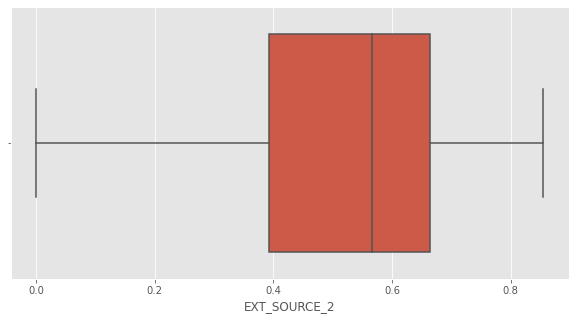

In [14]:
# EXT_SOURCE_2 is a continuous variable. So checking for outliers
plt.style.use('ggplot')
plt.figure(figsize=[10,5])
sns.boxplot(new_application['EXT_SOURCE_2'])
plt.show();

In [15]:
# Since EXT_SOURCE_2 has no outlier, we can choose mean to impute the column
imputVAL = round(new_application['EXT_SOURCE_2'].mean(),2)
print(f'Since EXT_SOURCE_2 has no outlier, the column can be imputed using the mean of the coumn i.e. {imputVAL}')

Since EXT_SOURCE_2 has no outlier, the column can be imputed using the mean of the coumn i.e. 0.51


OCCUPATION_TYPE imputation

In [16]:
new_application['AMT_ANNUITY'].value_counts()

9000.0     6385
13500.0    5514
6750.0     2279
10125.0    2035
37800.0    1602
           ... 
4635.0        1
65209.5       1
70920.0       1
85792.5       1
51331.5       1
Name: AMT_ANNUITY, Length: 13672, dtype: int64

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


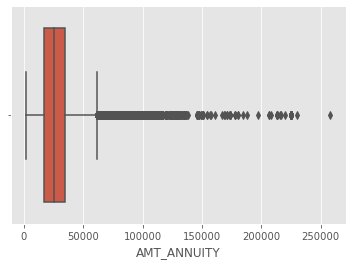

In [17]:
# Since AMT_ANNUITY is a continuous variable. So checking for outliers
sns.boxplot(new_application['AMT_ANNUITY'])
plt.show()

In [18]:
# Since AMT_ANNUITY has outlier, we can choose median to impute the column
imputVAL = round(new_application['AMT_ANNUITY'].median(),2)
print(f'Since AMT_ANNUITY has outliers, the column can be imputed using the median of the coumn i.e. {imputVAL}')

Since AMT_ANNUITY has outliers, the column can be imputed using the median of the coumn i.e. 24903.0


NAME_TYPE_SUITE imputation

In [19]:
new_application['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [20]:
imputVAL = new_application['NAME_TYPE_SUITE'].mode()
print(f'Clearly the column NAME_TYPE_SUITE is a categorical column. So this column can be imputed using the mode of the column i.e {imputVAL[0]}')

Clearly the column NAME_TYPE_SUITE is a categorical column. So this column can be imputed using the mode of the column i.e Unaccompanied


 CNT_FAM_MEMBERS imputation

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


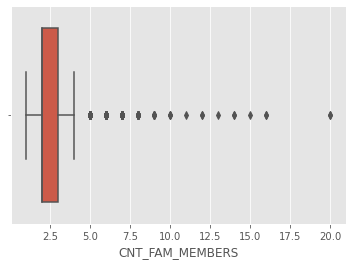

In [21]:
# Since this is count of family members, this is a continuous variable and we can impute the mean/median
sns.boxplot(new_application['CNT_FAM_MEMBERS'])
plt.show()

In [22]:
# This has outliers therefore we use median.
imputVAL = round(new_application['CNT_FAM_MEMBERS'].median(),2)
print(f'Since CNT_FAM_MEMBERS has outliers, the column can be imputed using the median of the coumn i.e. {imputVAL}')

Since CNT_FAM_MEMBERS has outliers, the column can be imputed using the median of the coumn i.e. 2.0


AMT_GOODS_PRICE imputation

In [23]:
new_application['AMT_GOODS_PRICE'].value_counts()

450000.0     26022
225000.0     25282
675000.0     24962
900000.0     15416
270000.0     11428
             ...  
592452.0         1
1130125.5        1
362632.5         1
498856.5         1
1271875.5        1
Name: AMT_GOODS_PRICE, Length: 1002, dtype: int64

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


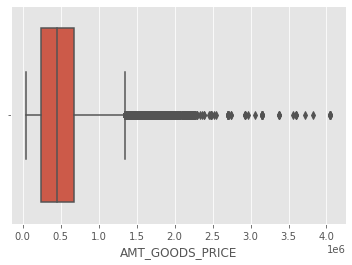

In [24]:
# AMT_GOODS_PRICE is a continuous variable. So checking for outliers
sns.boxplot(new_application['AMT_GOODS_PRICE'])
plt.show()

In [25]:
# Since this is a continuous variable with outliers we can impute column using median value
imputVAL = round(new_application['AMT_GOODS_PRICE'].median(),2)
print(f'Since AMT_GOODS_PRICE has outliers, the column can be imputed using the median of the coumn i.e. {imputVAL}')

Since AMT_GOODS_PRICE has outliers, the column can be imputed using the median of the coumn i.e. 450000.0


Now checking datatypes of columns and modify them appropriately

In [26]:
#Checking the float type columns
new_application.select_dtypes(include='float64').columns

Index(['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'OWN_CAR_AGE',
       'CNT_FAM_MEMBERS', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
       'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG',
       'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG',
       'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE',
       'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE',
       'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE',
       'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
       'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI',
       'COMMONAREA_MEDI', 'ELEVATORS_MEDI'

In [27]:
#Converting these count columns to int64.
ColumnToConvert = ['OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
                   'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
                   'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
                   'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']
new_application.loc[:,ColumnToConvert]=new_application.loc[:,ColumnToConvert].apply(lambda col: col.astype('int',errors='ignore'))
ColumnToConvert = list(new_application.select_dtypes(include='object').columns)
new_application.loc[:,ColumnToConvert]=new_application.loc[:,ColumnToConvert].apply(lambda col: col.astype('str',errors='ignore'))
new_application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
# Now making Gender more readable.
new_application['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [29]:
# Dropping the Gender = XNA from the data set as there are just 4 entries.
new_application = new_application[new_application['CODE_GENDER']!='XNA']
new_application['CODE_GENDER'].replace(['M','F'],['Male','Female'],inplace=True)
new_application

C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,Male,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,Female,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,Male,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,Female,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,Male,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,Male,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,Female,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,Female,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,Female,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
new_application[['DAYS_BIRTH' ,'DAYS_EMPLOYED' ,'DAYS_REGISTRATION' ,'DAYS_ID_PUBLISH']]

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH
0,-9461,-637,-3648.0,-2120
1,-16765,-1188,-1186.0,-291
2,-19046,-225,-4260.0,-2531
3,-19005,-3039,-9833.0,-2437
4,-19932,-3038,-4311.0,-3458
...,...,...,...,...
307506,-9327,-236,-8456.0,-1982
307507,-20775,365243,-4388.0,-4090
307508,-14966,-7921,-6737.0,-5150
307509,-11961,-4786,-2562.0,-931


Here we notice that "DAYS_BIRTH",'DAYS_EMPLOYED','DAYS_REGISTRATION'& 'DAYS_ID_PUBLISH' columns have negative values,which is not not possible so we will try to correct this

In [31]:
new_application[['DAYS_BIRTH' ,'DAYS_EMPLOYED' ,'DAYS_REGISTRATION' ,'DAYS_ID_PUBLISH']].describe()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH
count,307507.000000,307507.000000,307507.000000,307507.000000
mean,-16037.027271,63815.929208,-4986.131376,-2994.201670
std,4363.982424,141276.472519,3522.883030,1509.454566
min,-25229.000000,-17912.000000,-24672.000000,-7197.000000
25%,-19682.000000,-2760.000000,-7479.500000,-4299.000000
50%,-15750.000000,-1213.000000,-4504.000000,-3254.000000
75%,-12413.000000,-289.000000,-2010.000000,-1720.000000
max,-7489.000000,365243.000000,0.000000,0.000000


In [32]:
days_cols = ['DAYS_BIRTH' ,'DAYS_EMPLOYED' ,'DAYS_REGISTRATION' ,'DAYS_ID_PUBLISH']
new_application[days_cols] = new_application[days_cols].abs()
new_application[days_cols] = new_application[days_cols]/365
new_application[days_cols].describe()         #Here we've converted the vakues into years.

C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH
count,307507.000000,307507.000000,307507.000000,307507.000000
mean,43.937061,185.549507,13.660634,8.203292
std,11.956116,382.039642,9.651734,4.135492
min,20.517808,0.000000,0.000000,0.000000
25%,34.008219,2.556164,5.506849,4.712329
50%,43.150685,6.079452,12.339726,8.915068
75%,53.923288,15.635616,20.491781,11.778082
max,69.120548,1000.665753,67.594521,19.717808


In [33]:
#Noe let's rename the columns names to year.s as well.
new_application.rename(columns={'DAYS_BIRTH':'YEARS_BIRTH' ,'DAYS_EMPLOYED':'YEARS_EMPLOYED' ,
    'DAYS_REGISTRATION':'YEARS_REGISTRATION' ,'DAYS_ID_PUBLISH':'YEARS_ID_PUBLISH'}, inplace=True)

C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


Finally we'll be binning variables for analysis.

In [34]:
# Creating bins for income amount

bins = [0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,350000,375000,400000,425000,450000,475000,500000,10000000000]
slot = ['0-25000', '25000-50000','50000-75000','75000,100000','100000-125000', '125000-150000', '150000-175000','175000-200000',
       '200000-225000','225000-250000','250000-275000','275000-300000','300000-325000','325000-350000','350000-375000',
       '375000-400000','400000-425000','425000-450000','450000-475000','475000-500000','500000 and above']

new_application['AMT_INCOME_RANGE']=pd.cut(new_application['AMT_INCOME_TOTAL'],bins,labels=slot)
new_application.head()

<ipython-input-34-9744f081ba06>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_application['AMT_INCOME_RANGE']=pd.cut(new_application['AMT_INCOME_TOTAL'],bins,labels=slot)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_RANGE
0,100002,1,Cash loans,Male,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,200000-225000
1,100003,0,Cash loans,Female,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,250000-275000
2,100004,0,Revolving loans,Male,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,50000-75000
3,100006,0,Cash loans,Female,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,125000-150000
4,100007,0,Cash loans,Male,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,100000-125000


In [35]:
# Creating bins for Credit amount
bins = [0,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000,800000,850000,900000,1000000000]
slots = ['0-150000', '150000-200000','200000-250000', '250000-300000', '300000-350000', '350000-400000','400000-450000',
        '450000-500000','500000-550000','550000-600000','600000-650000','650000-700000','700000-750000','750000-800000',
        '800000-850000','850000-900000','900000 and above']
new_application['AMT_CREDIT_RANGE']=pd.cut(new_application['AMT_CREDIT'],bins=bins,labels=slots)

<ipython-input-35-f4785f1f6bc7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_application['AMT_CREDIT_RANGE']=pd.cut(new_application['AMT_CREDIT'],bins=bins,labels=slots)


In [36]:
# Dividing the dataset into two dataset of  target=1(client with payment difficulties) and target=0(all other)
target0_new_application=new_application.loc[new_application["TARGET"]==0]
target1_new_application=new_application.loc[new_application["TARGET"]==1]

In [37]:
# Calculating Imbalance percentage
# Since the majority is target0 and minority is target1
round(len(target0_new_application)/len(target1_new_application),2)

11.39

Thus the imbalance ratio is 11.39.

## Exploratory Data Analysis

### Target: Analysing the Target Column

Here target variables are 1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample; and 0 - all other cases.

In [38]:
new_application['TARGET'].value_counts()

0    282682
1     24825
Name: TARGET, dtype: int64

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


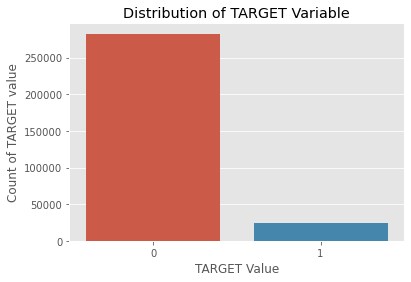

In [39]:
# Plotting a bar plot to visualize the percentage of value_counts
sns.countplot(new_application['TARGET'])
plt.xlabel("TARGET Value")
plt.ylabel("Count of TARGET value")
plt.title("Distribution of TARGET Variable")
plt.show()

Thus, Customers falling under Category: 1(Defaulters/Having payment difficulties) is about 8 percent and Customers falling under Category : 0(Non-Defaulters) is about 92 percent

In [40]:
# creating new datadrame for target=0
target0 = new_application[new_application['TARGET']==0]
target0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_RANGE,AMT_CREDIT_RANGE
1,100003,0,Cash loans,Female,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,250000-275000,900000 and above
2,100004,0,Revolving loans,Male,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,50000-75000,0-150000
3,100006,0,Cash loans,Female,N,Y,0,135000.0,312682.5,29686.5,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,125000-150000,300000-350000
4,100007,0,Cash loans,Male,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,100000-125000,500000-550000
5,100008,0,Cash loans,Male,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0.0,0.0,0.0,0.0,1.0,1.0,"75000,100000",450000-500000


In [41]:
# creating new datadrame for target=1
target1 = new_application[new_application['TARGET']==1]
target1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_RANGE,AMT_CREDIT_RANGE
0,100002,1,Cash loans,Male,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0.0,0.0,0.0,0.0,0.0,1.0,200000-225000,400000-450000
26,100031,1,Cash loans,Female,N,Y,0,112500.0,979992.0,27076.5,...,0,0,0.0,0.0,0.0,0.0,2.0,2.0,100000-125000,900000 and above
40,100047,1,Cash loans,Male,N,Y,0,202500.0,1193580.0,35028.0,...,0,0,0.0,0.0,0.0,2.0,0.0,4.0,200000-225000,900000 and above
42,100049,1,Cash loans,Female,N,N,0,135000.0,288873.0,16258.5,...,0,0,0.0,0.0,0.0,0.0,0.0,2.0,125000-150000,250000-300000
81,100096,1,Cash loans,Female,N,Y,0,81000.0,252000.0,14593.5,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,"75000,100000",250000-300000


In [42]:
target0.shape

(282682, 124)

In [43]:
target1.shape

(24825, 124)

In [44]:
# to get the ratio of appli_data_target0 : appli_data_target1
ratio = target0.shape[0]/target1.shape[0]
ratio

11.386988922457201

Okay, so basically the ratio of 0:1 is 11.387:1.

This clearly indicates that for every 1 there are almost 11 number of 0's. This is a higlhy imbalanced data set
we will now find the correlation between different variables for both dataframes with target=1 and target=0.

Now we will now find the correlation between different variables for both dataframes with target=1 and target=0.

In [433]:
# now we need to find top 10 correlations
corr0 = target0.corr()
corr_df0 = corr0.where(np.triu(np.ones(corr0.shape), k=1).astype(np.bool))
corr_df0 = corr_df0.unstack().reset_index().dropna(subset = [0])
corr_df0.columns = ['VAR1', 'VAR2', 'Correlation_Value']
corr_df0['Corr_abs'] = abs(corr_df0['Correlation_Value'])
corr_df0.sort_values(by = "Corr_abs", ascending =False, inplace = True)
corr_df0.head(10)

<ipython-input-433-14d915f986cc>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  corr_df0 = corr0.where(np.triu(np.ones(corr0.shape), k=1).astype(np.bool))


,VAR1,VAR2,Correlation_Value,Corr_abs
1493,FLAG_EMP_PHONE,YEARS_EMPLOYED,-0.999756,0.999756
6713,YEARS_BUILD_MEDI,YEARS_BUILD_AVG,0.998522,0.998522
8237,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.998508,0.998508
7248,FLOORSMIN_MEDI,FLOORSMIN_AVG,0.997201,0.997201
7141,FLOORSMAX_MEDI,FLOORSMAX_AVG,0.997018,0.997018
7034,ENTRANCES_MEDI,ENTRANCES_AVG,0.996899,0.996899
6927,ELEVATORS_MEDI,ELEVATORS_AVG,0.996161,0.996161
6820,COMMONAREA_MEDI,COMMONAREA_AVG,0.995857,0.995857
7569,LIVINGAREA_MEDI,LIVINGAREA_AVG,0.995568,0.995568
6392,APARTMENTS_MEDI,APARTMENTS_AVG,0.995163,0.995163


In [435]:
# Now we need to find top 10 correlations
corr1 = target1.corr()
corr_df1 = corr1.where(np.triu(np.ones(corr1.shape), k=1).astype(np.bool))
corr_df1 = corr_df1.unstack().reset_index().dropna(subset = [0])
corr_df1.columns = ['VAR1', 'VAR2', 'Correlation_Value']
corr_df1['Corr_abs'] = abs(corr_df1['Correlation_Value'])
corr_df1.sort_values(by = "Corr_abs", ascending =False, inplace = True)
corr_df1.head(10)

<ipython-input-435-047059188ec7>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  corr_df1 = corr1.where(np.triu(np.ones(corr1.shape), k=1).astype(np.bool))


,VAR1,VAR2,Correlation_Value,Corr_abs
1493,FLAG_EMP_PHONE,YEARS_EMPLOYED,-0.999705,0.999705
8237,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.998269,0.998269
6499,BASEMENTAREA_MEDI,BASEMENTAREA_AVG,0.998250,0.998250
6820,COMMONAREA_MEDI,COMMONAREA_AVG,0.998107,0.998107
6713,YEARS_BUILD_MEDI,YEARS_BUILD_AVG,0.998100,0.998100
7676,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAPARTMENTS_AVG,0.998075,0.998075
7248,FLOORSMIN_MEDI,FLOORSMIN_AVG,0.997825,0.997825
7462,LIVINGAPARTMENTS_MEDI,LIVINGAPARTMENTS_AVG,0.997668,0.997668
7141,FLOORSMAX_MEDI,FLOORSMAX_AVG,0.997187,0.997187
7690,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAPARTMENTS_MODE,0.997032,0.997032


As we can see from the top 10 correlations from both the dataframes, some of top 10 correlations for both are quite similar.

### Univariate Data Analysis

#### Target: Creating a function to carry out univariate analysis via a bar plot.

In [436]:
target0 = new_application[new_application['TARGET']==0]

In [437]:
target1 = new_application[new_application['TARGET']==1]

In [438]:
# Function to count plot for categorical variables
def allinoneplot(var):

    plt.style.use('ggplot')
    sns.despine
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(20,6))
    
    sns.countplot(x=var, data=target0,ax=ax1)
    ax1.set_ylabel('Total Counts')
    ax1.set_title(f'Distribution of {var} for Non-Defaulters',fontsize=15)
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")
    
# Adding the normalized percentage for easier comparision between defaulter and non-defaulter
    for p in ax1.patches:
        ax1.annotate('{:.1f}%'.format((p.get_height()/len(target0))*100), (p.get_x()+0.1, p.get_height()+50))
        
    sns.countplot(x=var, data=target1,ax=ax2)
    ax2.set_ylabel('Total Counts')
    ax2.set_title(f'Distribution of {var} for Defaulters',fontsize=15)    
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")
    
# Adding the normalized percentage for easier comparision between defaulter and non-defaulter
    for p in ax2.patches:
        ax2.annotate('{:.1f}%'.format((p.get_height()/len(target1))*100), (p.get_x()+0.1, p.get_height()+50))
    
    plt.show()


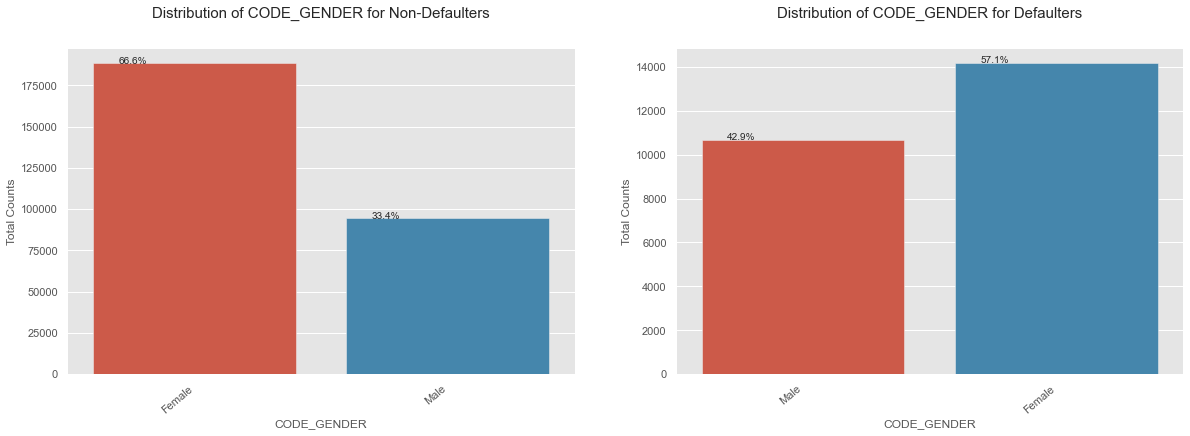

In [439]:
allinoneplot('CODE_GENDER')

Okay so now here we can see that Females contribute 66.6% to the non-defaulters while 57.1% to the defaulters. We can conclude that
we see more female applying for loans than males and hence the more number of female defaulters as well.
But the rate of defaulting of FEMALE is much lower compared to their MALE counterparts.

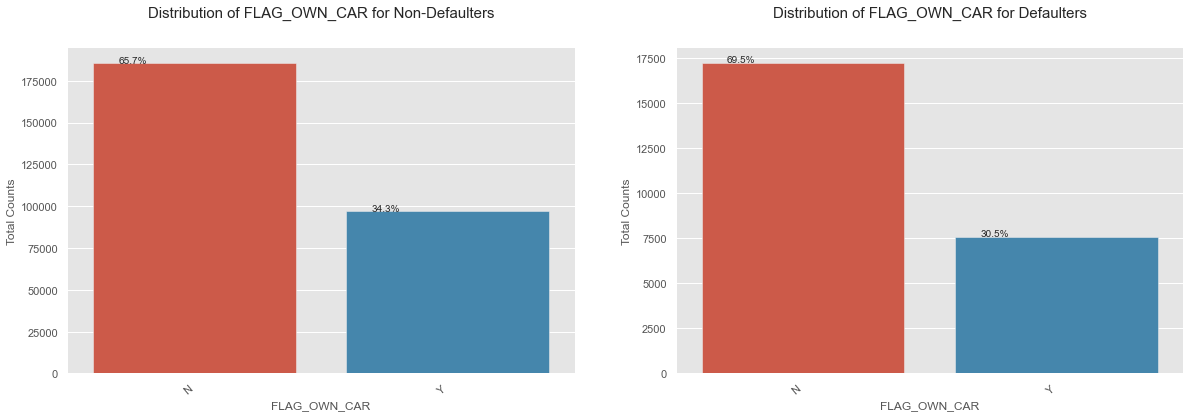

In [440]:
allinoneplot('FLAG_OWN_CAR')

We can see that people with cars contribute 65.7% to the non-defaulters while 69.5% to the defaulters. We can conclude that
While people who have car default more often, the reason could be there are simply more people without cars
Looking at the percentages in both the charts, we can conclude that the rate of default of people having car is low compared to people who don't.

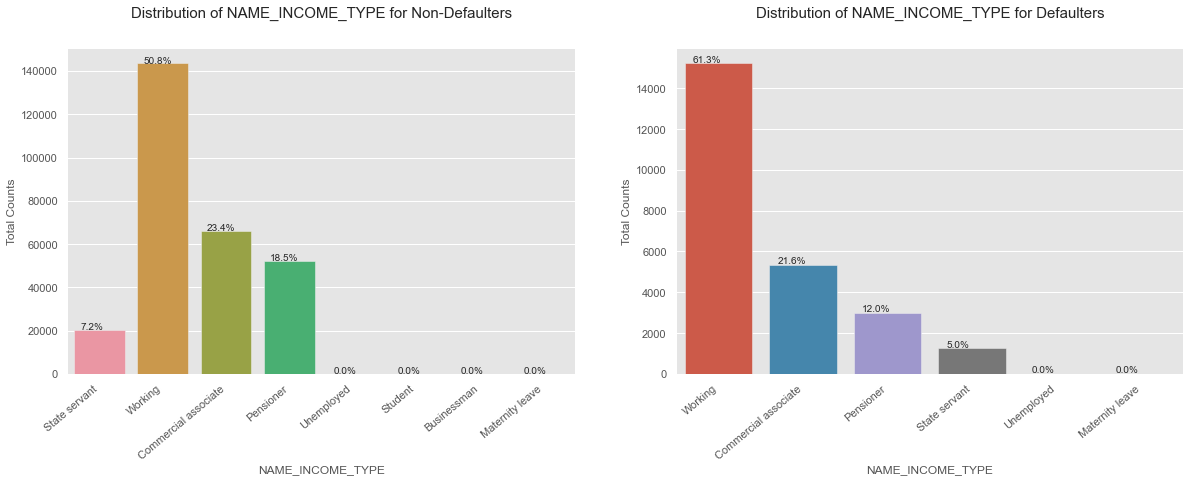

In [441]:
allinoneplot('NAME_INCOME_TYPE')

Interesting! 

We notice here that the students don't default. But now here the reason can be that they are not required to pay during the time they are students.
We can also see that the BusinessMen never default and so does Unemployed(which is quite obvious) and Maternity leave category.
Most of the loans are distributed to working class people
We also see that working class people contribute 51% to non defaulters while they contribute to 61% of the defaulters. Clearly, the chances of defaulting are more in their case

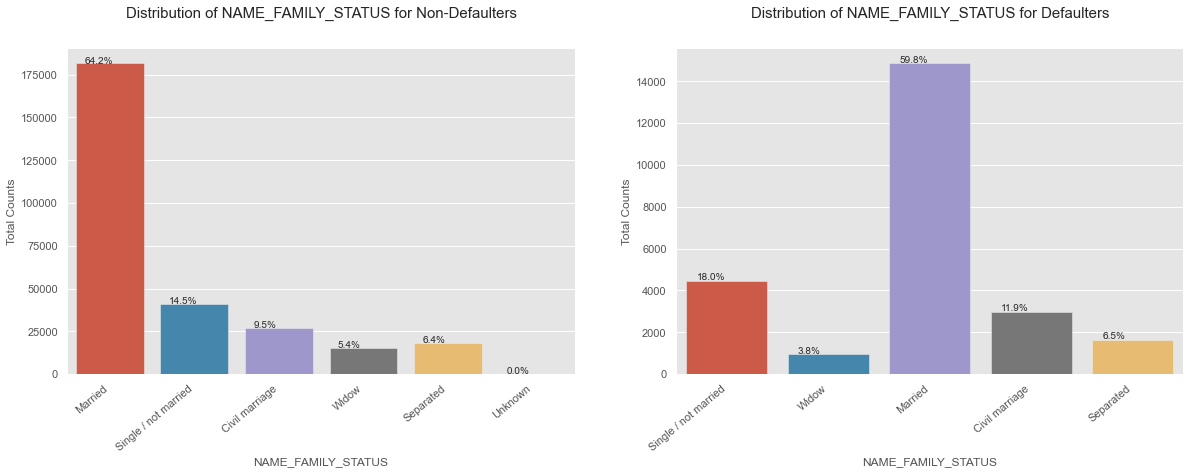

In [442]:
allinoneplot('NAME_FAMILY_STATUS')

Married people tends to apply for loans more often here. But single/non Married people also contribute 14.5% to Non Defaulters and 18% to the defaulters. So there is more risk associated with them.

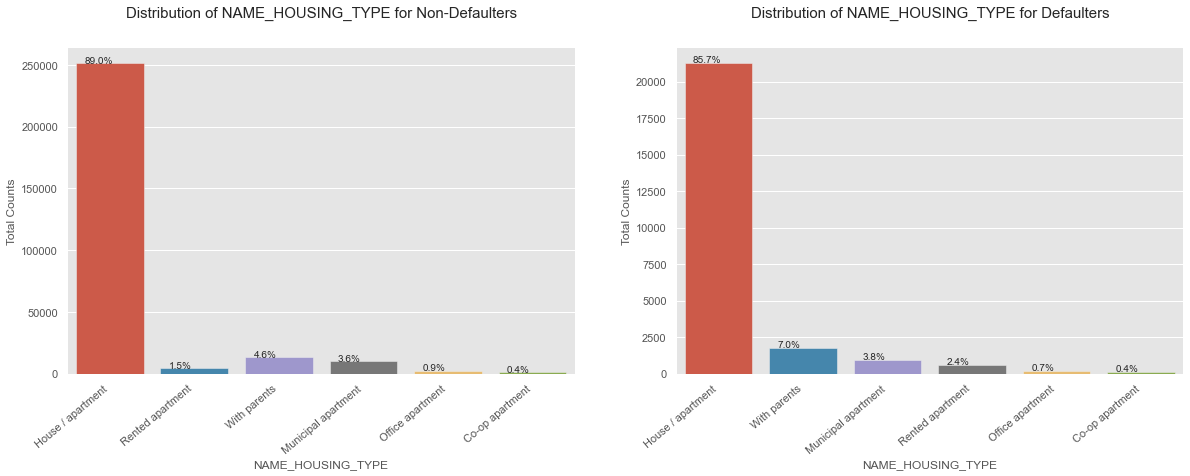

In [443]:
allinoneplot('NAME_HOUSING_TYPE')

Okay now people who have House/Appartment, tend to apply for more loans.
People living with parents tend to default more often when compared with others.The reason could be their living expenses are more as their parents are living with them.

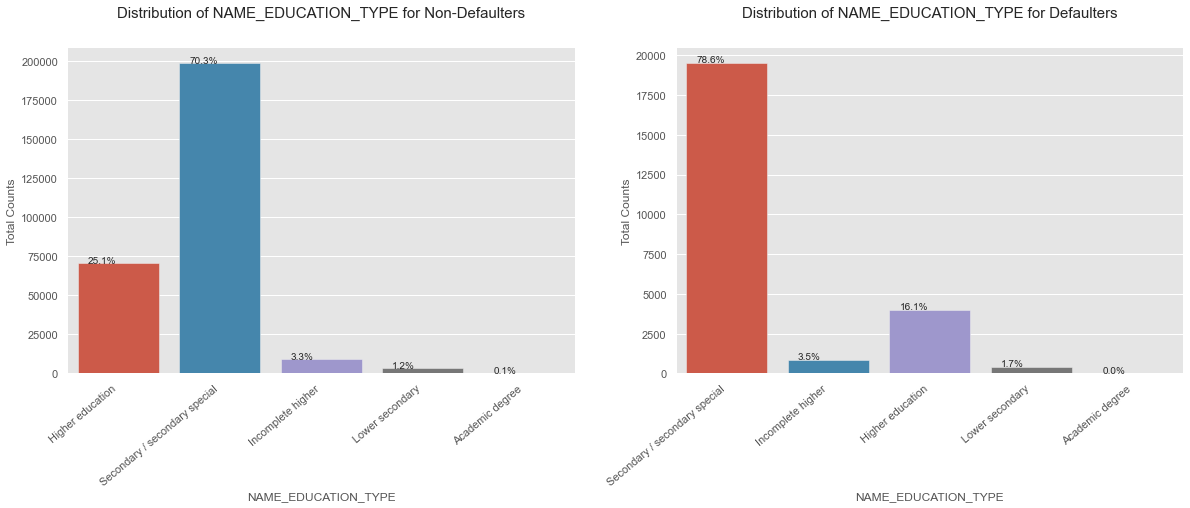

In [444]:
allinoneplot('NAME_EDUCATION_TYPE')

Almost all of the Education categories are equally likely to default except for the higher educated ones who are less likely to default and secondary educated people are more likely to default.

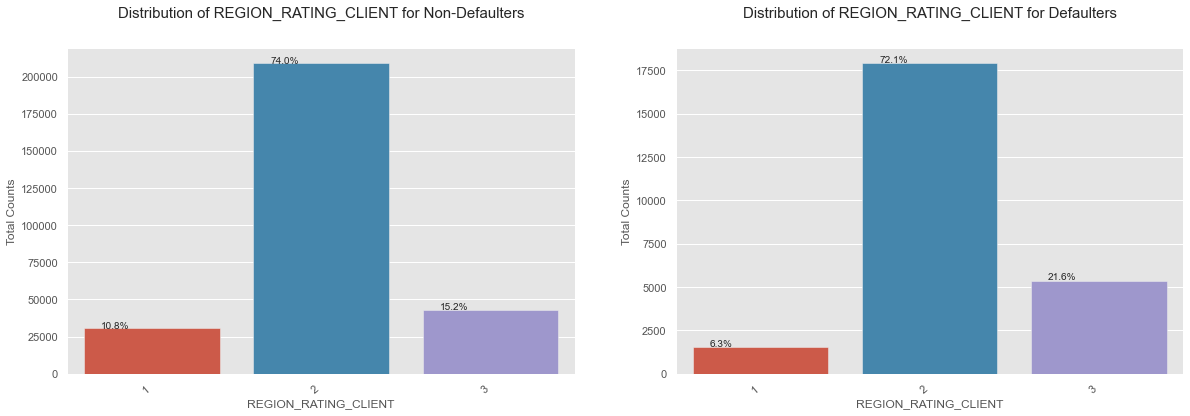

In [445]:
allinoneplot('REGION_RATING_CLIENT')

Now here people from 2nd- tier regions apply for loans a lot as their contribution is high in both defaulters and non-defaulters. While people from 3rd- tier regions tend to be more defaulters than non-defaulters. And the 1st- tier people apply for loans very less also they tend to be more non-defaulters than defaulters.

#### Target: Looking at the income dataset deeply

In [446]:
def allinoneplot1(df,col,title,hue =None):
    
    sns.set_style('darkgrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='husl') 
        
    plt.show()

<ipython-input-446-10cb3008156e>:10: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  temp = pd.Series(data = hue)


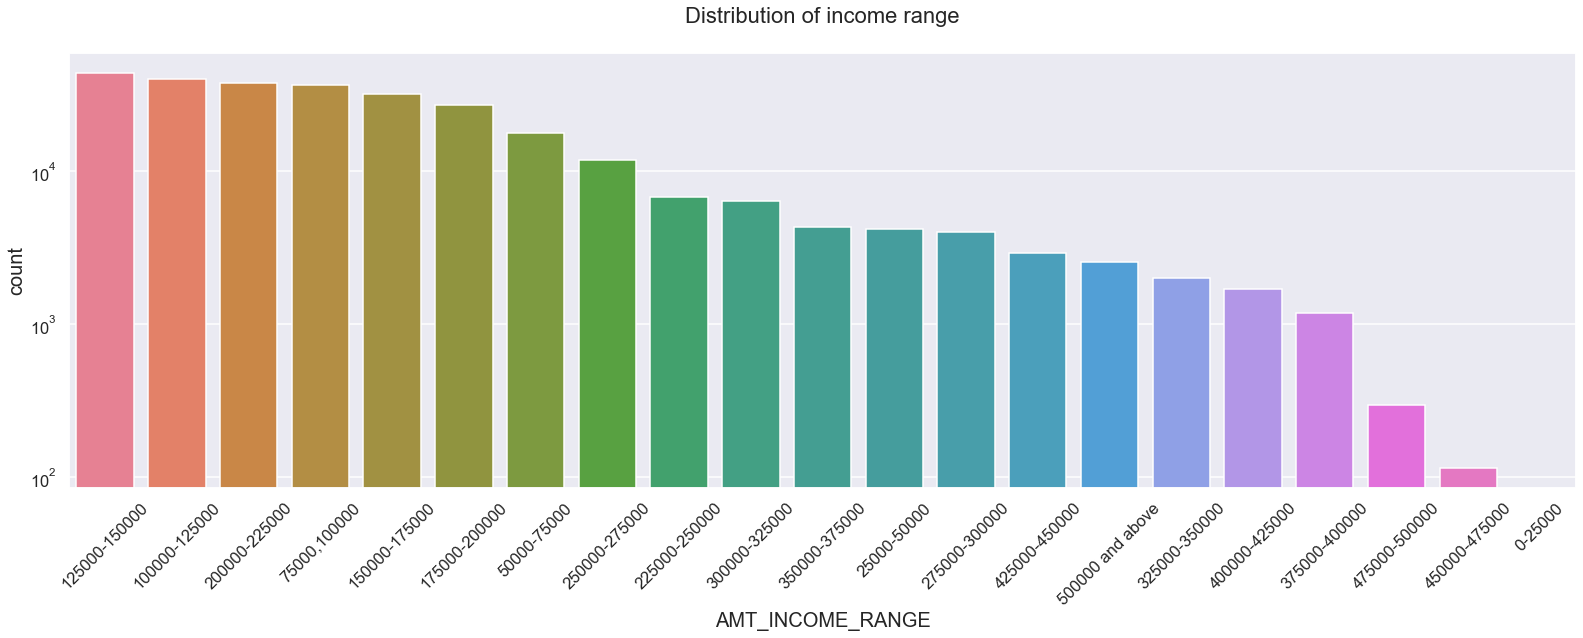

In [447]:
allinoneplot1(target0,col='AMT_INCOME_RANGE',title='Distribution of income range')

<ipython-input-446-10cb3008156e>:10: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  temp = pd.Series(data = hue)


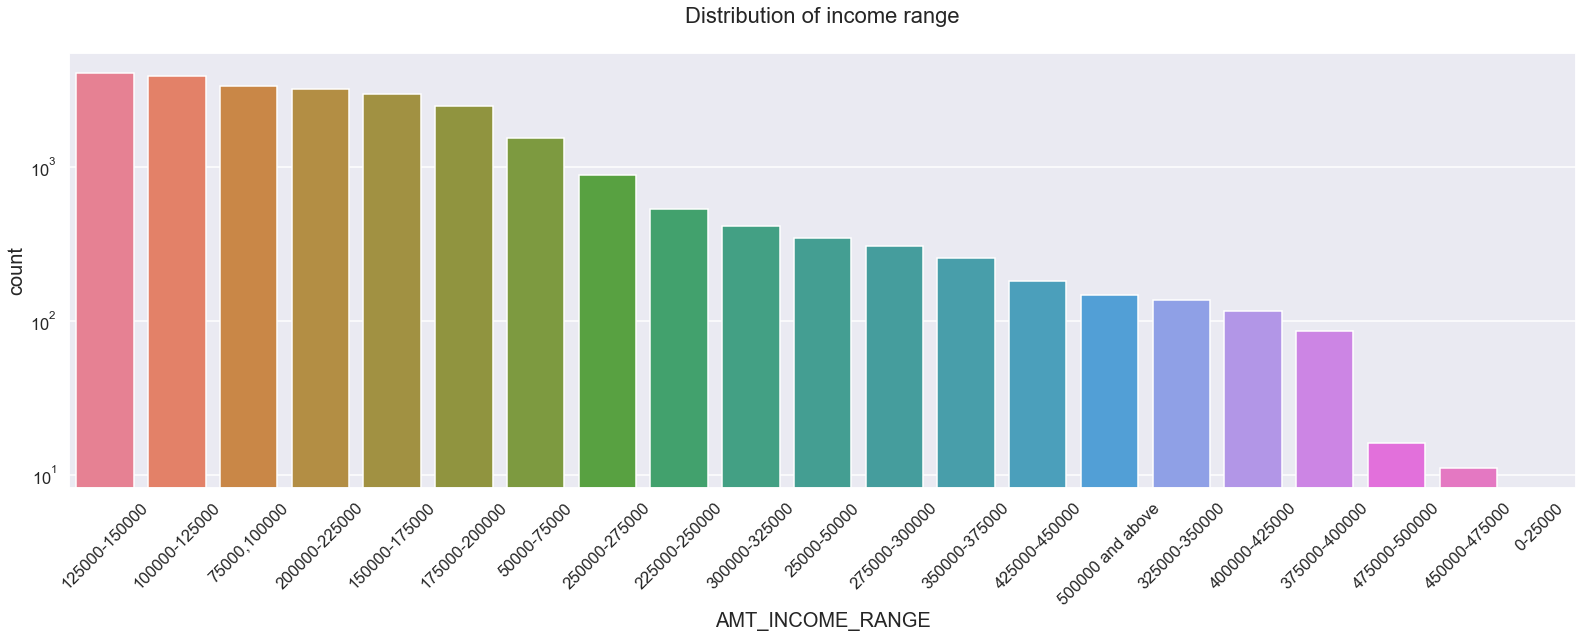

In [448]:
allinoneplot1(target1,col='AMT_INCOME_RANGE',title='Distribution of income range')

<ipython-input-446-10cb3008156e>:10: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  temp = pd.Series(data = hue)


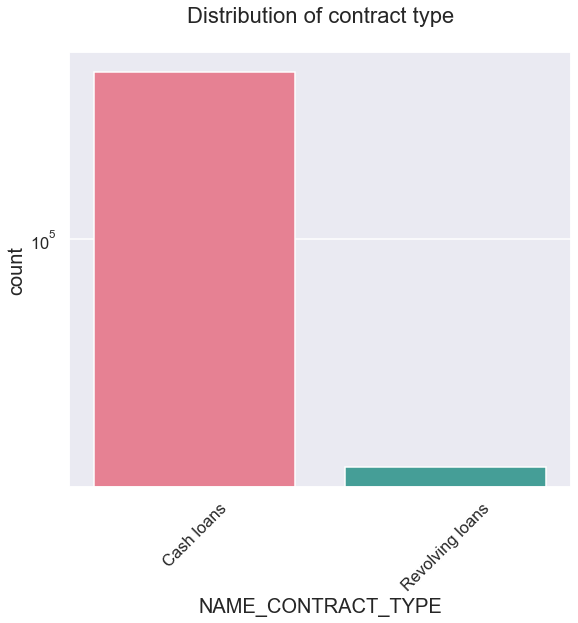

In [449]:
allinoneplot1(target0,col='NAME_CONTRACT_TYPE',title='Distribution of contract type')

<ipython-input-446-10cb3008156e>:10: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  temp = pd.Series(data = hue)


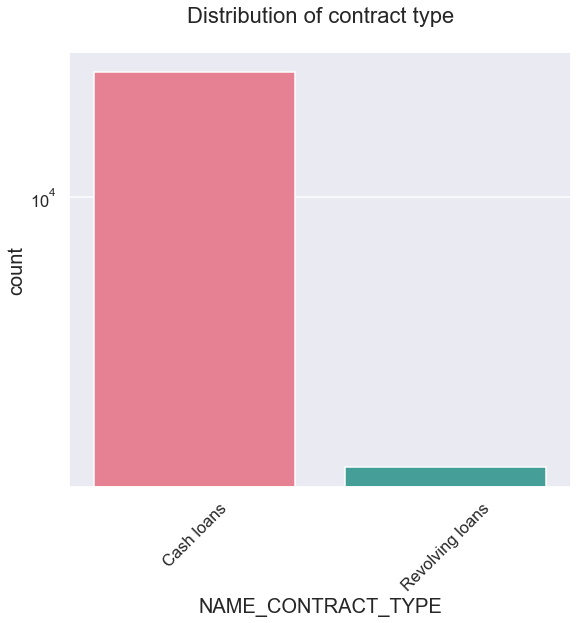

In [450]:
allinoneplot1(target1,col='NAME_CONTRACT_TYPE',title='Distribution of contract type')

Thus, points to be concluded:

-- Income range from 100000 to 200000 is having more number of credits.
-- Very less count for income range 400000 and above.
-- For income type ‘working’, ’commercial associate’, and ‘State Servant’ the number of credits are higher than others.
-- Less number of credits for income type ‘student’ ,’pensioner’, ‘Businessman’ and ‘Maternity leave’.
-- For contract type ‘cash loans’ is having higher number of credits than ‘Revolving loans’ contract type.

## Bivariate Data Analysis

### Target: Here we will compare and look at the datasets for better insights.

In [451]:
def plotnew(var1,var2):

    plt.style.use('ggplot')
    sns.despine
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(20,6))
    
    sns.scatterplot(x=var1, y=var2,data=target0,ax=ax1)
    ax1.set_xlabel(var1)    
    ax1.set_ylabel(var2)
    ax1.set_title(f'{var1} vs {var2} for Non-Defaulters',fontsize=15)
    
    sns.scatterplot(x=var1, y=var2,data=target1,ax=ax2)
    ax2.set_xlabel(var1)    
    ax2.set_ylabel(var2)
    ax2.set_title(f'{var1} vs {var2} for Defaulters',fontsize=15)
            
    plt.show()

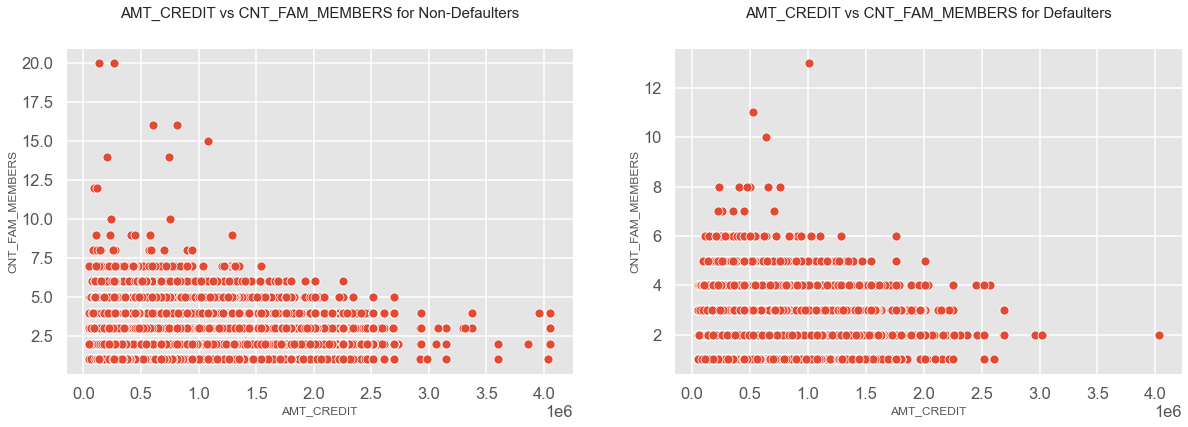

In [452]:
plotnew('AMT_CREDIT','CNT_FAM_MEMBERS')

We can see that the density in the lower left corner is similar in both the cases, so the people are equally likely to default if the family is small and the AMT_CREDIT is low. We can observe that larger families and people with larger AMT_CREDIT default less often.

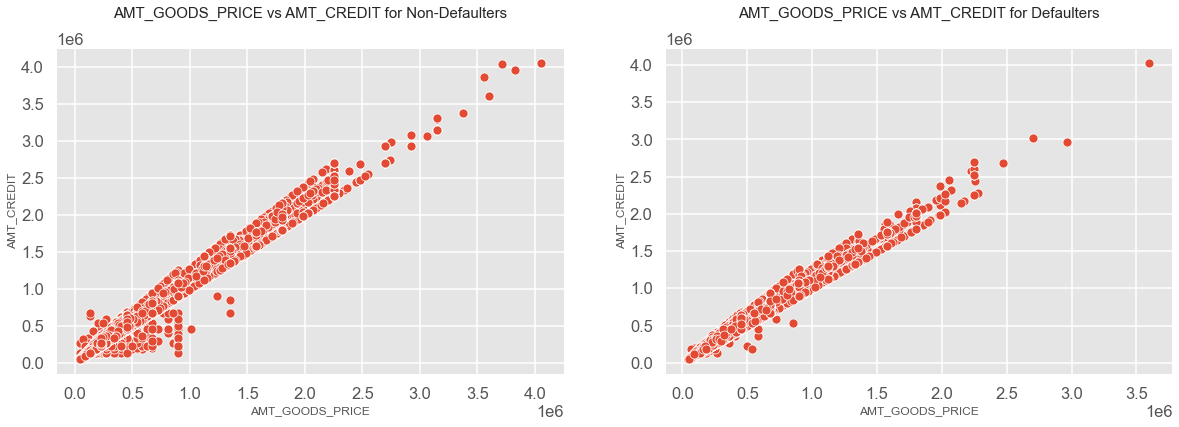

In [453]:
plotnew('AMT_GOODS_PRICE','AMT_CREDIT')

Here both are linearly related just like below.

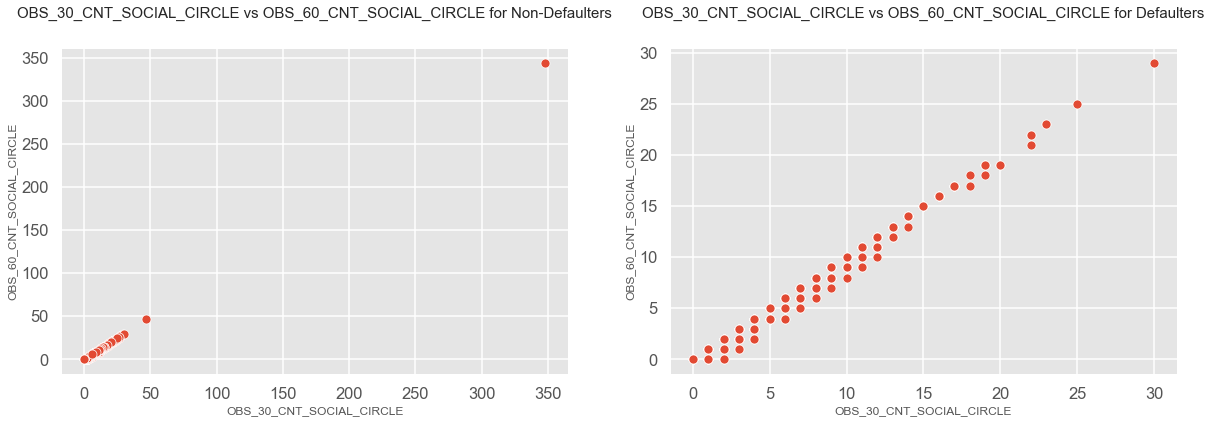

In [454]:
plotnew('OBS_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE')

Here we observe that OBS_30_CNT_SOCIAL_CIRCLE and OBS_60_CNT_SOCIAL_CIRCLE are linearly related.

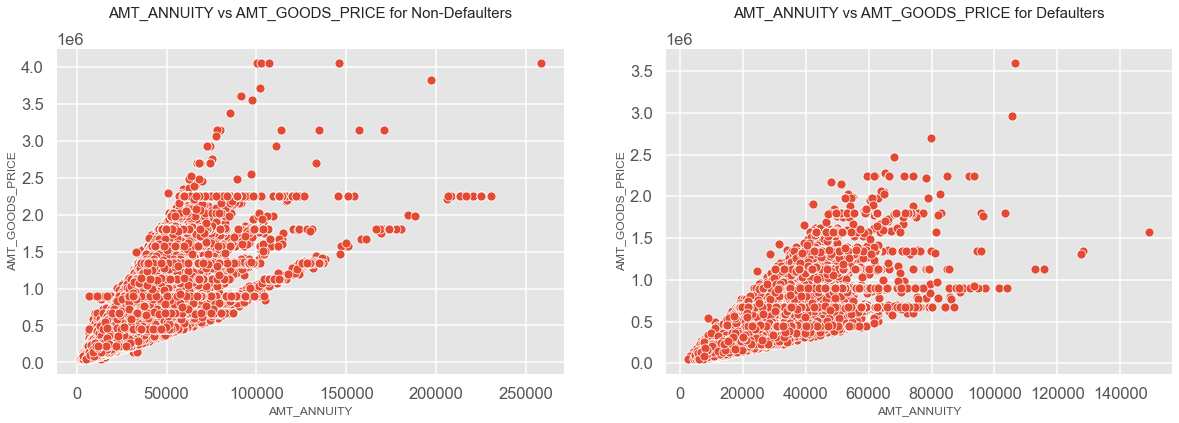

In [455]:
plotnew('AMT_ANNUITY','AMT_GOODS_PRICE')

This is quite obvious that sum of Amount_ANNUITY(Term repayments) is equal to the loan amount and our plot depicts the same
when both plots scales are compared it says that the AMT_ANNUITY scale is less than 140000,when compared with No payment difficulties it says that the higher amount installments dont have much much defaulters which is one way profit to the bank with regular payments from customers

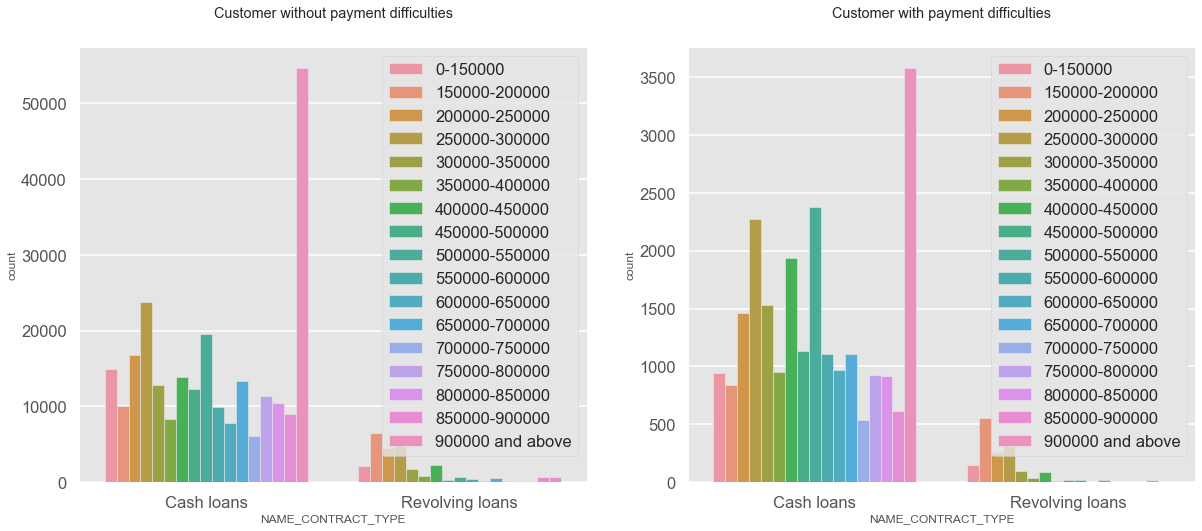

In [456]:
plt.figure(figsize=(20,8)) 

plt.subplot(1,2,1)
ax = sns.countplot(data=target0,x='NAME_CONTRACT_TYPE',hue='AMT_CREDIT_RANGE')
plt.title('Customer without payment difficulties')
plt.legend(loc='upper right')


plt.subplot(1,2,2)
ax = sns.countplot(data=target1,x='NAME_CONTRACT_TYPE',hue='AMT_CREDIT_RANGE')
plt.title('Customer with payment difficulties')
plt.legend(loc='upper right')
plt.show()

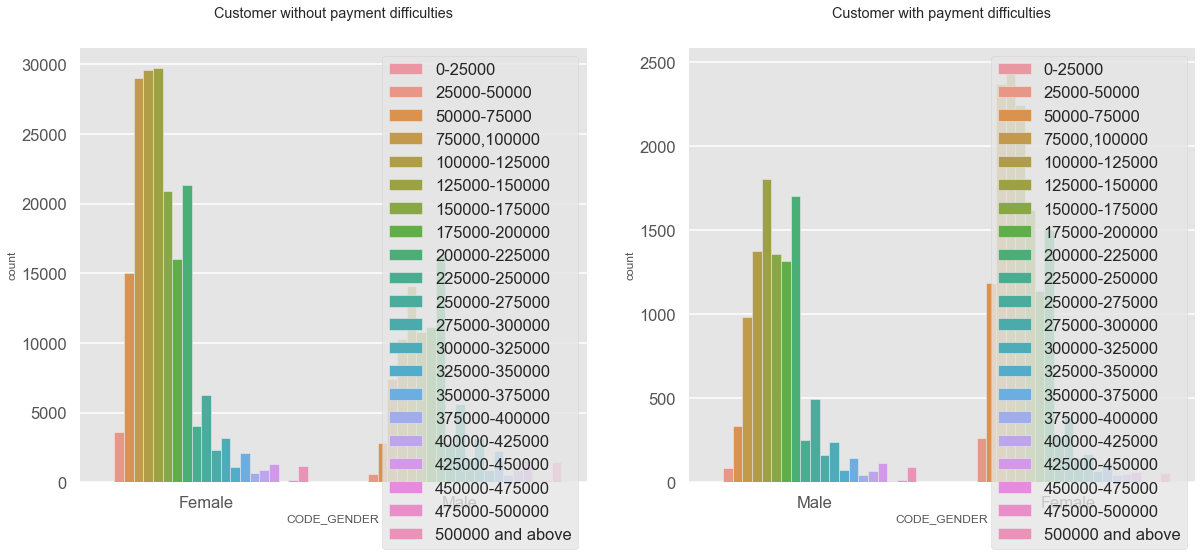

In [457]:
plt.figure(figsize=(20,8)) 

plt.subplot(1,2,1)
ax = sns.countplot(data=target0,x='CODE_GENDER',hue='AMT_INCOME_RANGE')
plt.title('Customer without payment difficulties')
plt.legend(loc='upper right')


plt.subplot(1,2,2)
ax = sns.countplot(data=target1,x='CODE_GENDER',hue='AMT_INCOME_RANGE')
plt.title('Customer with payment difficulties')
plt.legend(loc='upper right')
plt.show()

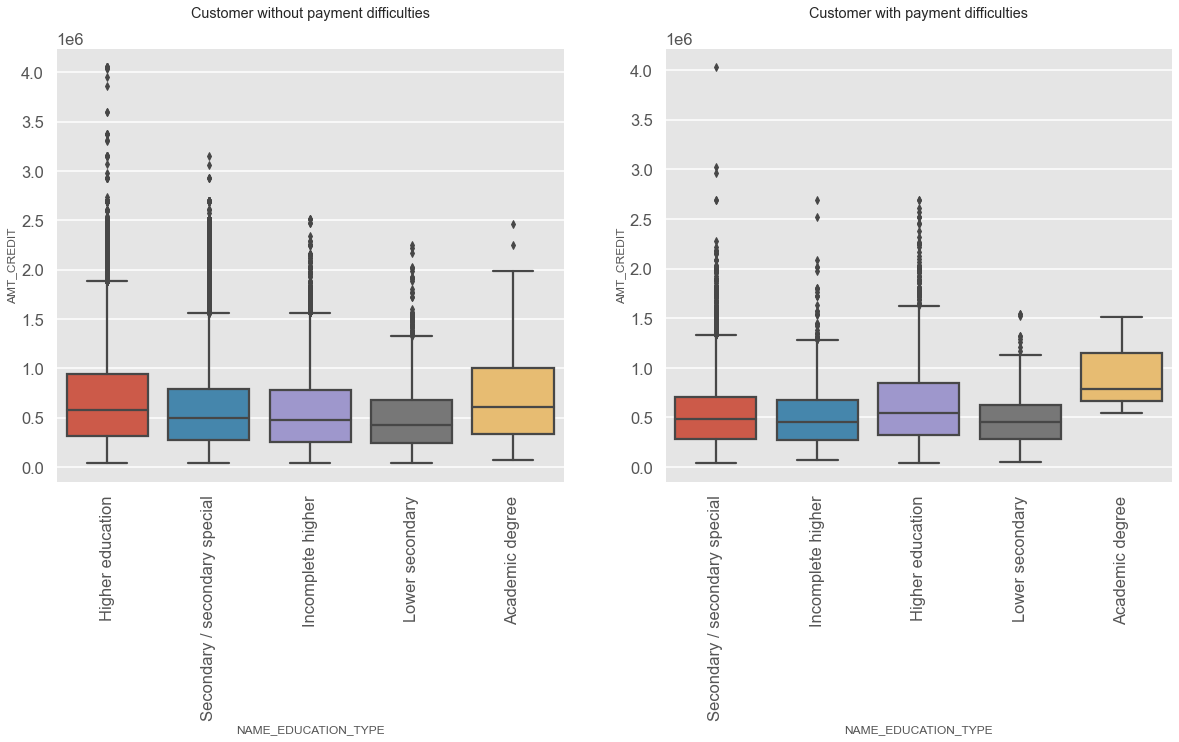

In [458]:
plt.figure(figsize=(20,8)) 

plt.subplot(1,2,1)
ax = sns.boxplot(data=target0,y='AMT_CREDIT',x='NAME_EDUCATION_TYPE')
plt.title('Customer without payment difficulties')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
ax = sns.boxplot(data=target1,y='AMT_CREDIT',x='NAME_EDUCATION_TYPE')
plt.title('Customer with payment difficulties')
plt.xticks(rotation=90)
plt.show()

Here we can see that the range of customers without payment of Academic degree is higher than the customer of with payment. And the rest of the Education type is almost same for both the cases

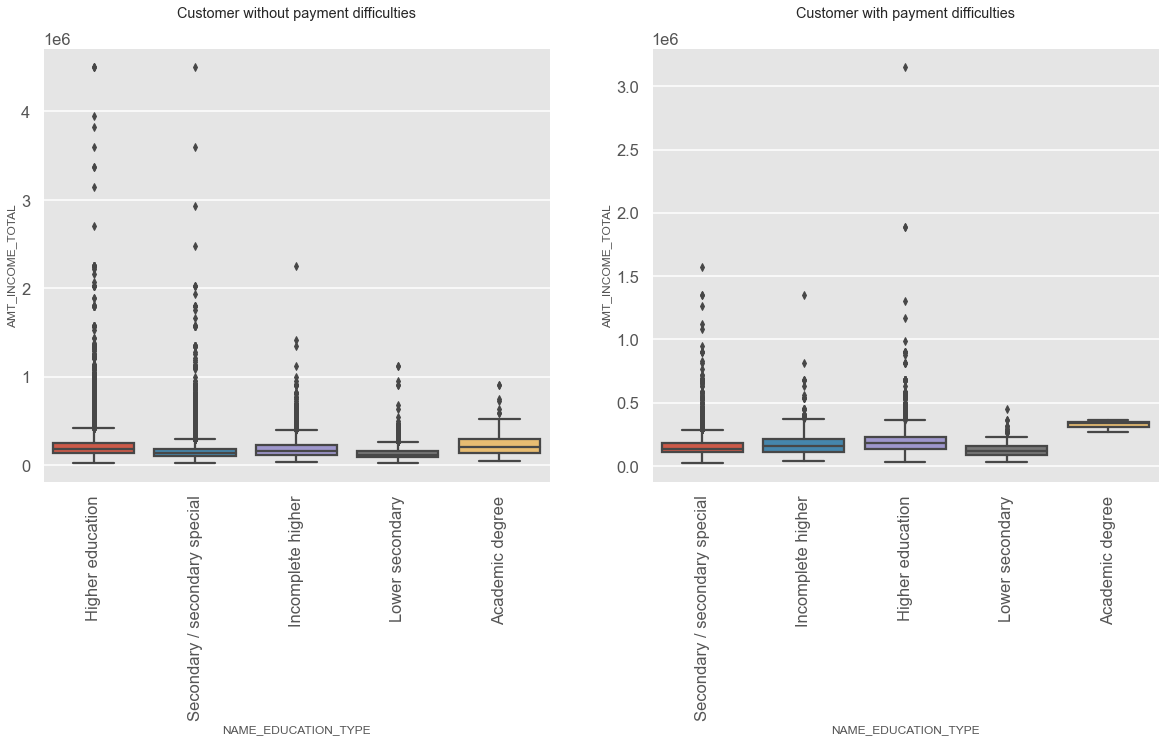

In [459]:
plt.figure(figsize=(20,8)) 

plt.subplot(1,2,1)
ax = sns.boxplot(data=target0[target0['AMT_INCOME_TOTAL']<5000000],y='AMT_INCOME_TOTAL',x='NAME_EDUCATION_TYPE')
plt.title('Customer without payment difficulties')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
ax = sns.boxplot(data=target1[target1['AMT_INCOME_TOTAL']<5000000],y='AMT_INCOME_TOTAL',x='NAME_EDUCATION_TYPE')
plt.title('Customer with payment difficulties')
plt.xticks(rotation=90)
plt.show()

Here we can see that the customers without payment is having more outliers as compare to the customer with payment.

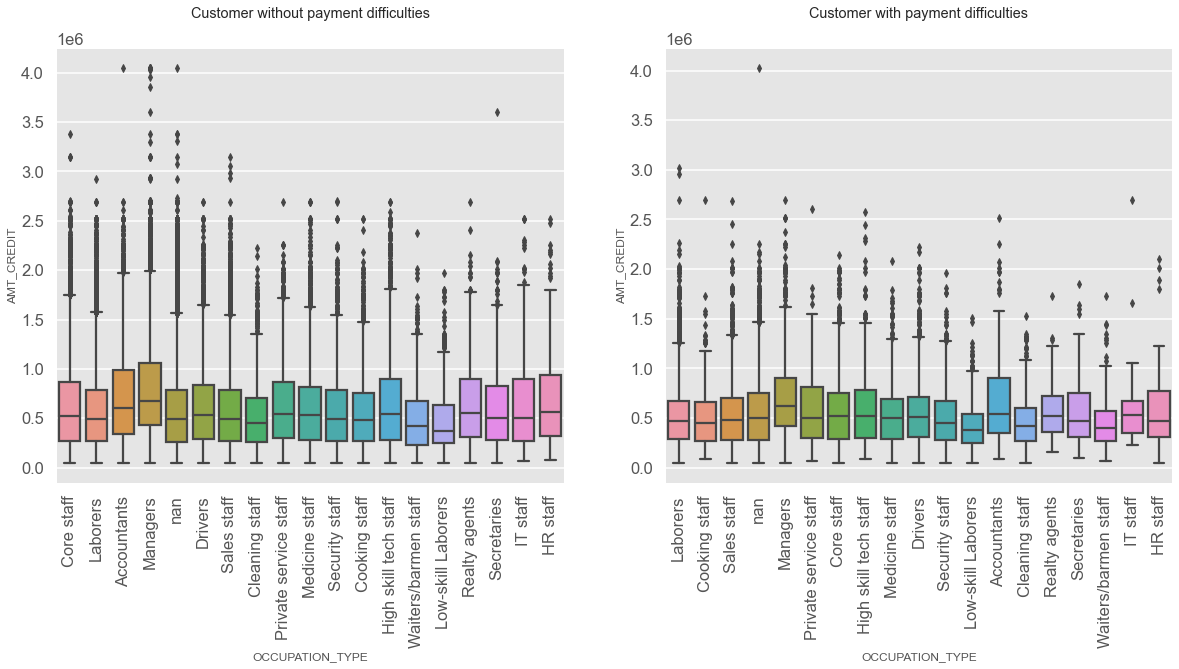

In [460]:
plt.figure(figsize=(20,8)) 

plt.subplot(1,2,1)
ax = sns.boxplot(data=target0,y='AMT_CREDIT',x='OCCUPATION_TYPE')
plt.title('Customer without payment difficulties')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
ax = sns.boxplot(data=target1,y='AMT_CREDIT',x='OCCUPATION_TYPE')
plt.title('Customer with payment difficulties')
plt.xticks(rotation=90)
plt.show()

Here we can see that the range of the customers without payment more as compare to the customers with payment.

## previous_application dataset

In [461]:
previous_application = pd.read_csv(r'C:\Users\Admin\Downloads\previous_application.csv')

In [462]:
previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [463]:
previous_application.shape

(1670214, 37)

In [464]:
previous_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [465]:
previous_application.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,...,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,...,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,...,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,...,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,...,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,...,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,...,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,...,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [466]:
previous_application.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

Again a lot of null values here. let's have a look at the percentage of null values.

In [467]:
percent=((previous_application.isnull().sum()/previous_application.shape[0])*100).round(2)
percent

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_DOWN_PAYMENT               53.64
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
RATE_DOWN_PAYMENT              53.64
RATE_INTEREST_PRIMARY          99.64
RATE_INTEREST_PRIVILEGED       99.64
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
N

In [468]:
# Lets consider only columns having less than 20 percent of null values in it
previous_application=previous_application[percentageofnullvalues[percent<20].index]
previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_APPLICATION,AMT_CREDIT,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,...,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,17145.0,17145.0,SATURDAY,15,Y,1,XAP,...,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,middle,POS mobile with interest
1,2802425,108129,Cash loans,607500.0,679671.0,THURSDAY,11,Y,1,XNA,...,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,112500.0,136444.5,TUESDAY,11,Y,1,XNA,...,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,high,Cash X-Sell: high
3,2819243,176158,Cash loans,450000.0,470790.0,MONDAY,7,Y,1,XNA,...,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,337500.0,404055.0,THURSDAY,9,Y,1,Repairs,...,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,high,Cash Street: high


In [469]:
def anotherplot(var):

    plt.style.use('ggplot')
    sns.despine
    fig,ax = plt.subplots(1,1,figsize=(15,5))
    
    sns.countplot(x=var, data=previous_application,ax=ax,hue='NAME_CONTRACT_STATUS')
    ax.set_ylabel('Total Counts')
    ax.set_title(f'Distribution of {var}',fontsize=15)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    
    plt.show()

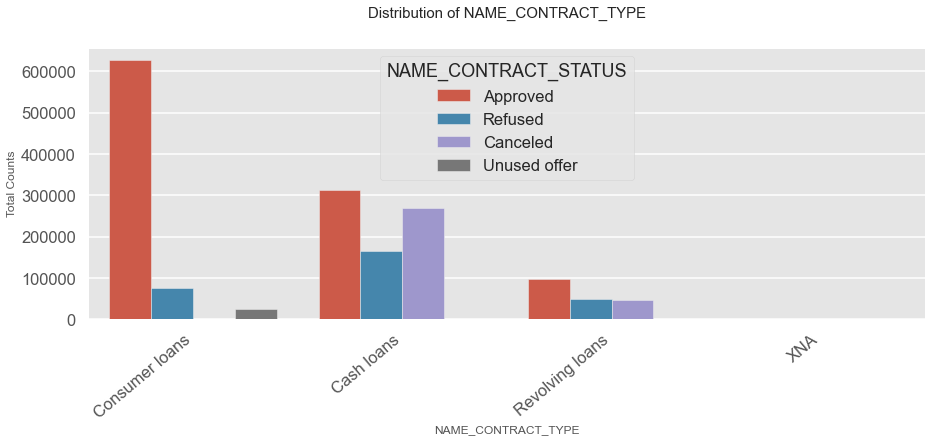

In [470]:
anotherplot('NAME_CONTRACT_TYPE')

From the above chart, we can infer that, most of the applications are for 'Cash loan' and 'Consumer loan'. Although the cash loans are refused more often than others.

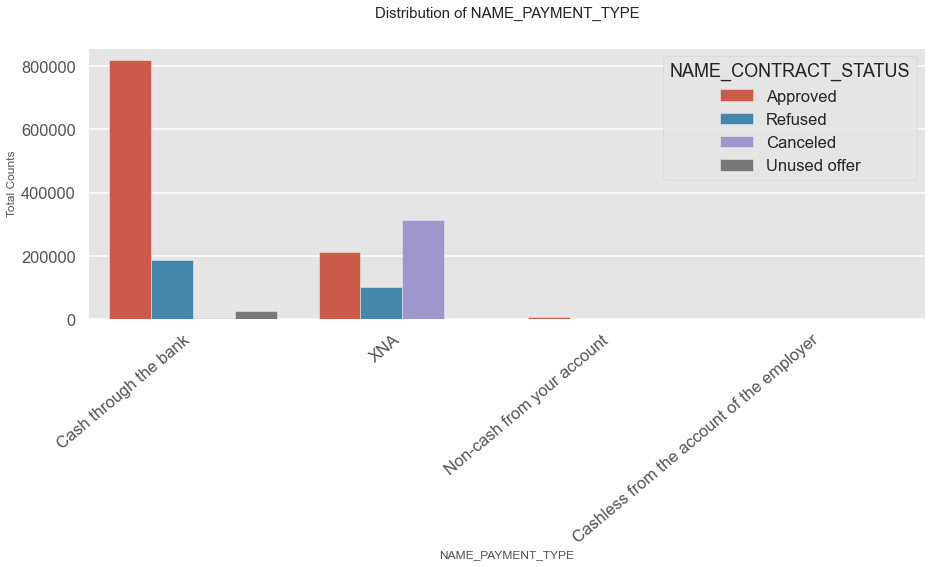

In [471]:
anotherplot('NAME_PAYMENT_TYPE')

From the above chart, we can infer that most of the clients chose to repay the loan using the 'Cash through the bank' option
We can also see that 'Non-Cash from your account' & 'Cashless from the account of the employee' options are not at all popular in terms of loan repayment amongst the customers.

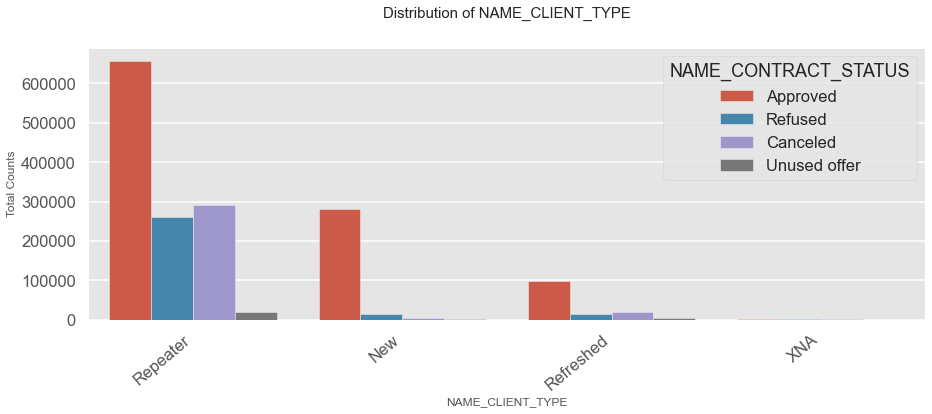

In [472]:
anotherplot('NAME_CLIENT_TYPE')

Most of the loan applications are from repeat customers, out of the total applications 70% of customers are repeaters. They also get refused most often.

In [473]:
#Getting the top 10 correlation PreviousApplication
corr=previous_application.corr()
corr_df = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool)).unstack().reset_index()
corr_df.columns=['Column1','Column2','Correlation']
corr_df.dropna(subset=['Correlation'],inplace=True)
corr_df['Abs_Correlation']=corr_df['Correlation'].abs()
corr_df = corr_df.sort_values(by=['Abs_Correlation'], ascending=False)
corr_df.head(10)

<ipython-input-473-8c7046ef4754>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  corr_df = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool)).unstack().reset_index()


,Column1,Column2,Correlation,Abs_Correlation
26,AMT_CREDIT,AMT_APPLICATION,0.975824,0.975824
51,DAYS_DECISION,AMT_CREDIT,0.133763,0.133763
50,DAYS_DECISION,AMT_APPLICATION,0.133660,0.133660
52,DAYS_DECISION,HOUR_APPR_PROCESS_START,-0.039962,0.039962
43,NFLAG_LAST_APPL_IN_DAY,AMT_CREDIT,-0.025179,0.025179
35,HOUR_APPR_PROCESS_START,AMT_CREDIT,-0.021039,0.021039
48,DAYS_DECISION,SK_ID_PREV,0.019100,0.019100
62,SELLERPLACE_AREA,DAYS_DECISION,-0.018382,0.018382
53,DAYS_DECISION,NFLAG_LAST_APPL_IN_DAY,0.016555,0.016555
60,SELLERPLACE_AREA,HOUR_APPR_PROCESS_START,0.015671,0.015671


In [474]:
#merging the application_data with previous application data
all_data = pd.merge(left=new_application, right=previous_application,how='inner', on='SK_ID_CURR',suffixes='_x')

<ipython-input-474-07508c2fa3c1>:2: FutureWarning: Passing 'suffixes' as a <class 'str'>, is not supported and may give unexpected results. Provide 'suffixes' as a tuple instead. In the future a 'TypeError' will be raised.
  all_data = pd.merge(left=new_application, right=previous_application,how='inner', on='SK_ID_CURR',suffixes='_x')


In [475]:
all_data.shape

(1413646, 146)

In [476]:
all_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_,AMT_ANNUITY,...,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,Cash loans,Male,N,Y,0,202500.0,406597.5,24700.5,...,XAP,New,Vehicles,POS,XNA,Stone,500,Auto technology,low_normal,POS other with interest
1,100003,0,Cash loans,Female,N,N,0,270000.0,1293502.5,35698.5,...,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,low_normal,Cash X-Sell: low
2,100003,0,Cash loans,Female,N,N,0,270000.0,1293502.5,35698.5,...,XAP,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,middle,POS industry with interest
3,100003,0,Cash loans,Female,N,N,0,270000.0,1293502.5,35698.5,...,XAP,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,middle,POS household with interest
4,100004,0,Revolving loans,Male,Y,Y,0,67500.0,135000.0,6750.0,...,XAP,New,Mobile,POS,XNA,Regional / Local,30,Connectivity,middle,POS mobile without interest


In [477]:
all_data.NAME_CONTRACT_STATUS.unique()

array(['Approved', 'Canceled', 'Refused', 'Unused offer'], dtype=object)

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


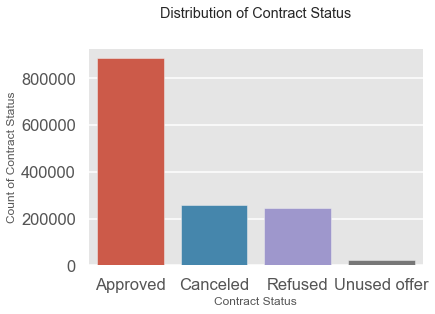

In [478]:
sns.countplot(all_data.NAME_CONTRACT_STATUS)
plt.xlabel("Contract Status")
plt.ylabel("Count of Contract Status")
plt.title("Distribution of Contract Status")
plt.show()

In [479]:
# Also let's will check the percentages of each type of contract status
all_data['NAME_CONTRACT_STATUS'].value_counts()*100/len(all_data)

Approved        62.680190
Canceled        18.352119
Refused         17.356891
Unused offer     1.610799
Name: NAME_CONTRACT_STATUS, dtype: float64

In [480]:
def plotcombined(Varx,Vary):
    
    plt.style.use('ggplot')
    sns.despine
    NewDat = all_data.pivot_table(values='SK_ID_CURR', 
                      index=Varx,
                      columns=Vary,
                      aggfunc='count')
    NewDat=NewDat.div(NewDat.sum(axis=1),axis='rows')*100
    sns.set()
    NewDat.plot(kind='bar',stacked=True,figsize=(15,5))
    plt.title(f'Effect Of {Varx} on Loan Approval')
    plt.xlabel(f'{Varx}')
    plt.ylabel(f'{Vary}%')
    plt.show()

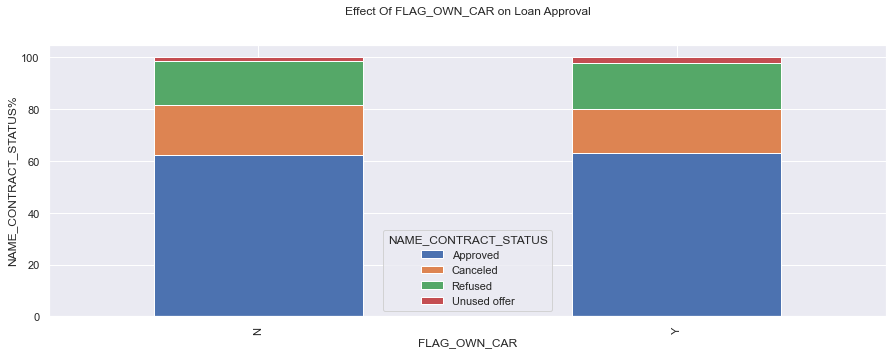

In [481]:
plotcombined('FLAG_OWN_CAR','NAME_CONTRACT_STATUS')

We see that car ownership doesn't have any effect on application approval or rejection. But we saw earlier that the people who has a car has lesser chances of default. The bank can add more weightage to car ownership while approving a loan amount

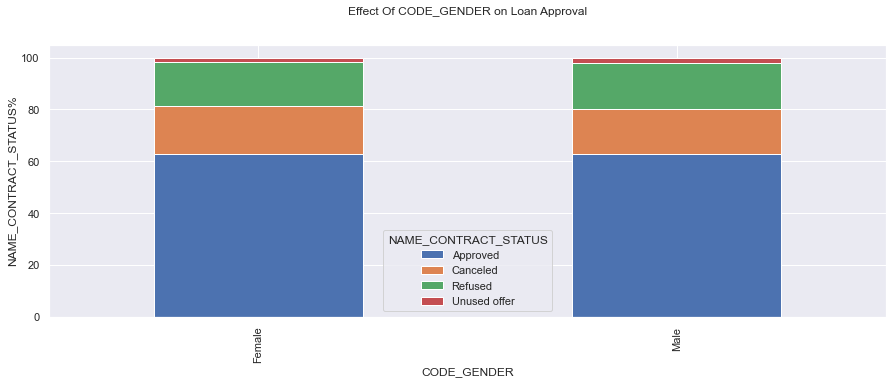

In [482]:
plotcombined('CODE_GENDER','NAME_CONTRACT_STATUS')

We see that code gender doesn't have any effect on application approval or rejection.
But we saw earlier that female have lesser chances of default compared to males. The bank can add more weightage to female while approving a loan amount.

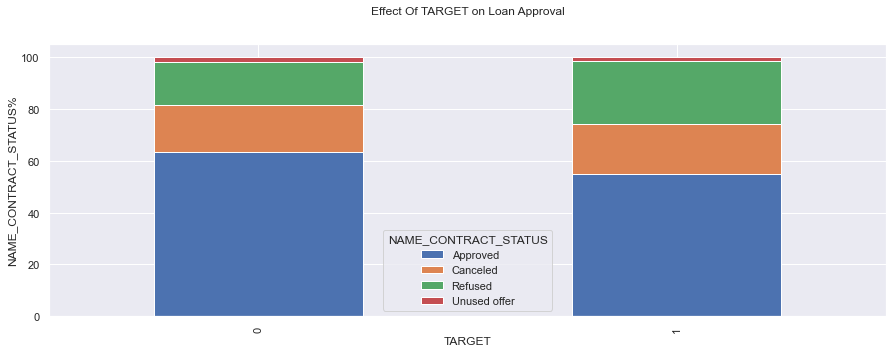

In [483]:
plotcombined('TARGET','NAME_CONTRACT_STATUS')

We can see that the people who were approved for a loan earlier, defaulted less often where as people who were refused a loan earlier have higher chances of defaulting.

In [484]:
# Dividing the new dataframe into 4 parts based on the contract status, i.e: Approved, refused, canceled, unused
approved_df = all_data[all_data['NAME_CONTRACT_STATUS']=='Approved']
refused_df = all_data[all_data['NAME_CONTRACT_STATUS']=='Refused']
canceled_df = all_data[all_data['NAME_CONTRACT_STATUS']=='Canceled']
unused_df = all_data[all_data['NAME_CONTRACT_STATUS']=='Unused offer']

In [485]:
all_data['NAME_CONTRACT_TYPEx'].value_counts()

Cash loans         626741
Consumer loans     625239
Revolving loans    161353
XNA                   313
Name: NAME_CONTRACT_TYPEx, dtype: int64

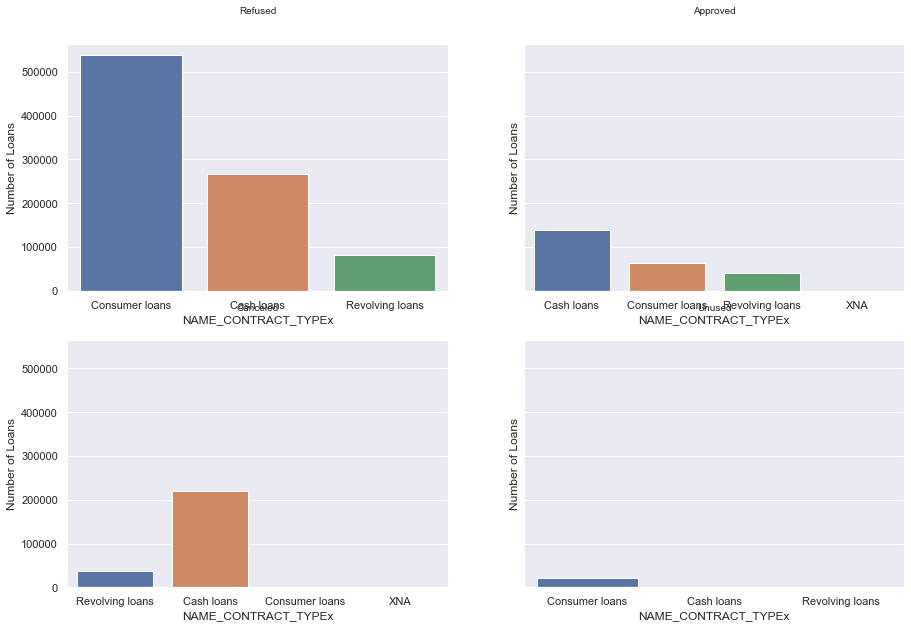

In [486]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2,ncols=2, figsize=(15,10),sharey=True)

ax1 = sns.countplot(ax=ax1,data=approved_df,x='NAME_CONTRACT_TYPEx')
ax1.set_title("Refused", fontsize=10)
ax1.set_xlabel('NAME_CONTRACT_TYPEx')
ax1.set_ylabel("Number of Loans")
# ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)

ax2 = sns.countplot(ax=ax2,data=refused_df,x='NAME_CONTRACT_TYPEx')
ax2.set_title("Approved", fontsize=10)
ax2.set_xlabel('NAME_CONTRACT_TYPEx')
ax2.set_ylabel("Number of Loans")
# ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)

ax3 = sns.countplot(ax=ax3,data=canceled_df,x='NAME_CONTRACT_TYPEx')
ax3.set_title("Canceled", fontsize=10)
ax3.set_xlabel('NAME_CONTRACT_TYPEx')
ax3.set_ylabel("Number of Loans")
# ax3.set_xticklabels(ax3.get_xticklabels(),rotation=90)

ax4 = sns.countplot(ax=ax4,data=unused_df,x='NAME_CONTRACT_TYPEx')
ax4.set_title("Unused", fontsize=10)
ax4.set_xlabel('NAME_CONTRACT_TYPEx')
ax4.set_ylabel("Number of Loans")
# ax4.set_xticklabels(ax4.get_xticklabels(),rotation=90)
plt.show()

Here we can see that the Revolving loan is much more acceptable as compare to the cash and consumer loans.
as we can see that to visualize 4 plots we wrote same code multiple times. so to avoid redundancy, and to save our time, we will put the above code in a function and generalize it for our following plots, so that its easy to visualize and saves time

In [487]:
def multi_plot(variable_name):
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2,ncols=2, figsize=(15,12), sharey='all')
    fig.tight_layout(pad=10.0)

    ax1 = sns.countplot(ax=ax1,data=approved_df,x=variable_name)
    ax1.set_title("Refused", fontsize=10)
    ax1.set_ylabel("Number of Loans")
    ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)

    ax2 = sns.countplot(ax=ax2,data=refused_df,x=variable_name)
    ax2.set_title("Approved", fontsize=10)
    ax2.set_ylabel("Number of Loans")
    ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)

    ax3 = sns.countplot(ax=ax3,data=canceled_df,x=variable_name)
    ax3.set_title("Canceled", fontsize=10)
    ax3.set_xlabel(variable_name)
    ax3.set_ylabel("Number of Loans")
    ax3.set_xticklabels(ax3.get_xticklabels(),rotation=90)

    ax4 = sns.countplot(ax=ax4,data=unused_df,x=variable_name)
    ax4.set_title("Unused", fontsize=10)
    ax4.set_xlabel(variable_name)
    ax4.set_ylabel("Number of Loans")
    ax4.set_xticklabels(ax4.get_xticklabels(),rotation=90)
    
    plt.show()

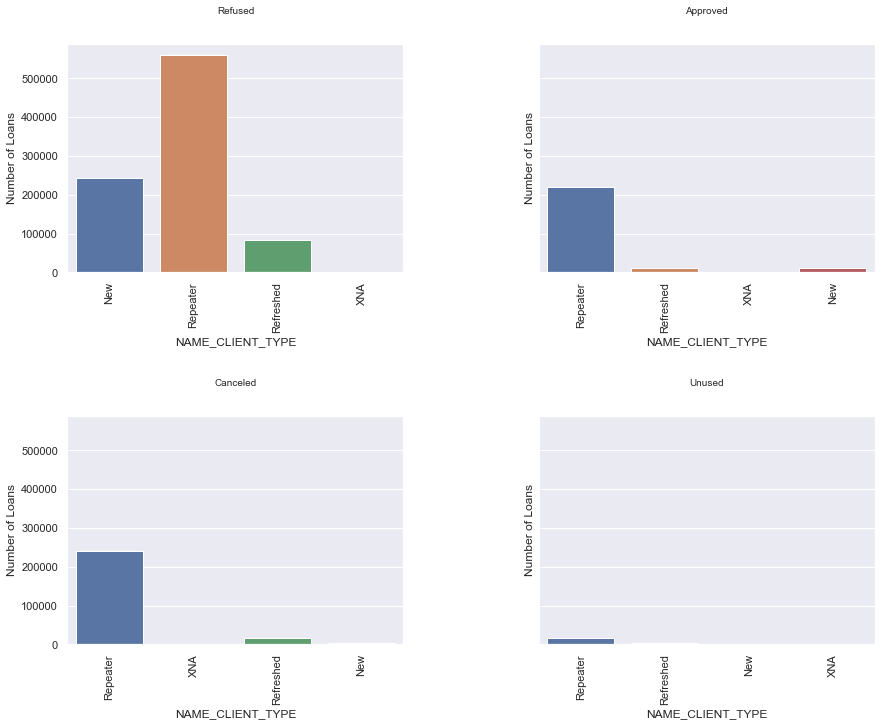

In [488]:
multi_plot('NAME_CLIENT_TYPE')

Here we can see that the Repeater is getting more Refused but also we can see that the it also getting more approved and even that it is getting more canceled and more usused.

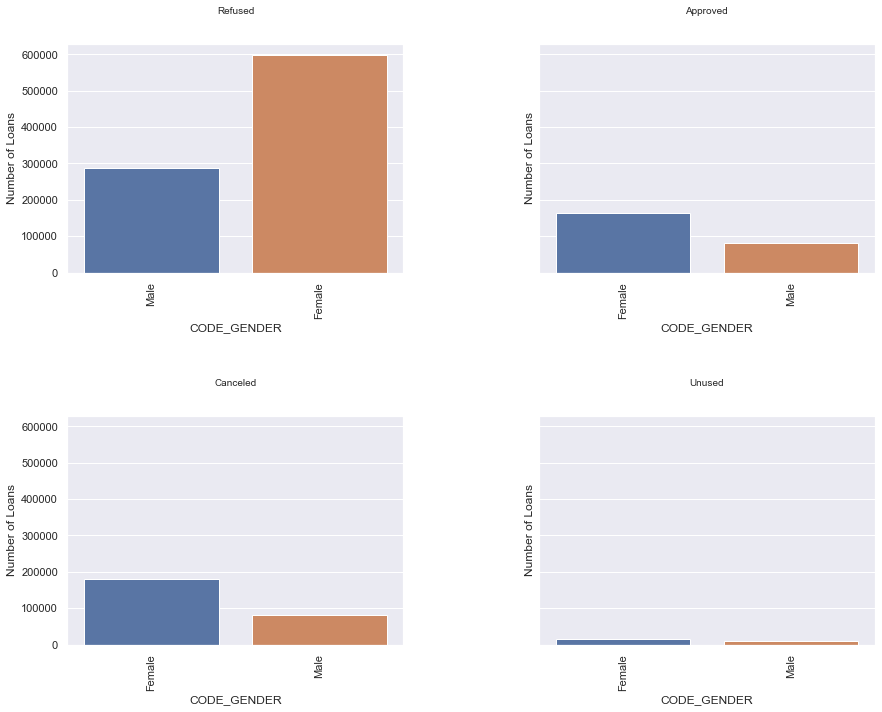

In [489]:
multi_plot('CODE_GENDER')

Here we can see that Female is getting more Refused more approved more canceled more unused but in case of male it is having average in every category

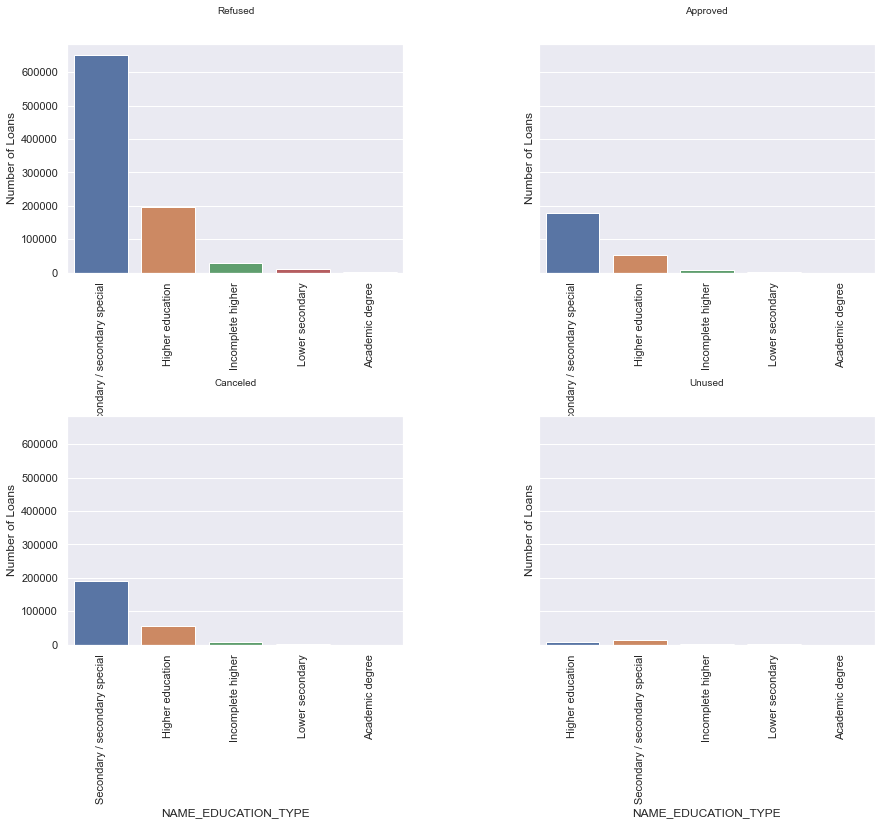

In [490]:
multi_plot('NAME_EDUCATION_TYPE')

Here we can see that Secondary/ Secondary special is more effective in every case.


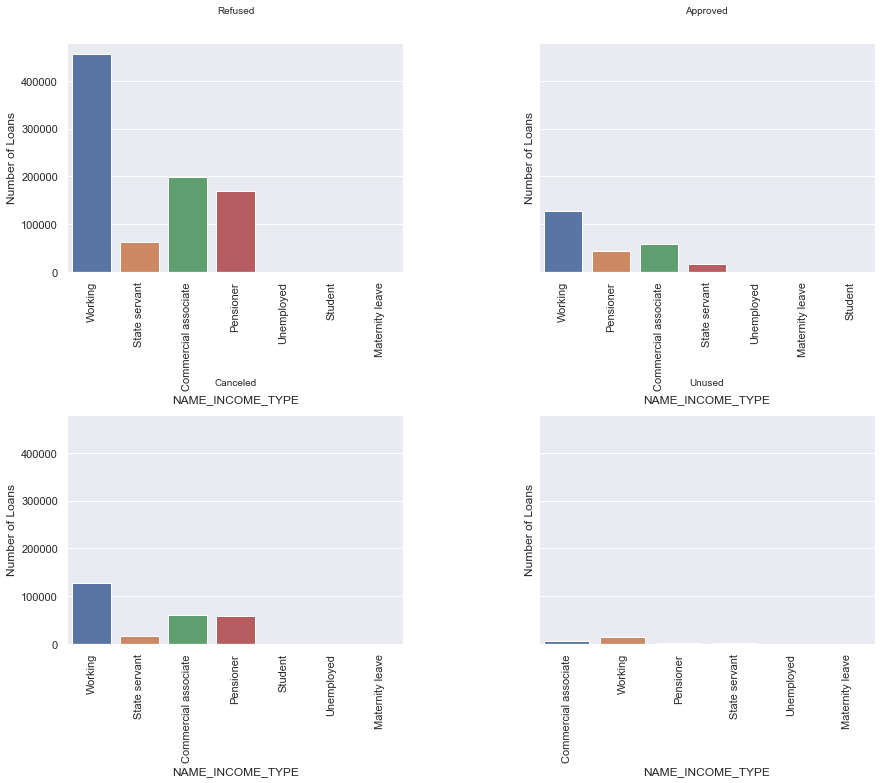

In [491]:
multi_plot('NAME_INCOME_TYPE')

Here we can see that the working type people are applying more loans as compare to others and also Commercial associates people are taking more loans.

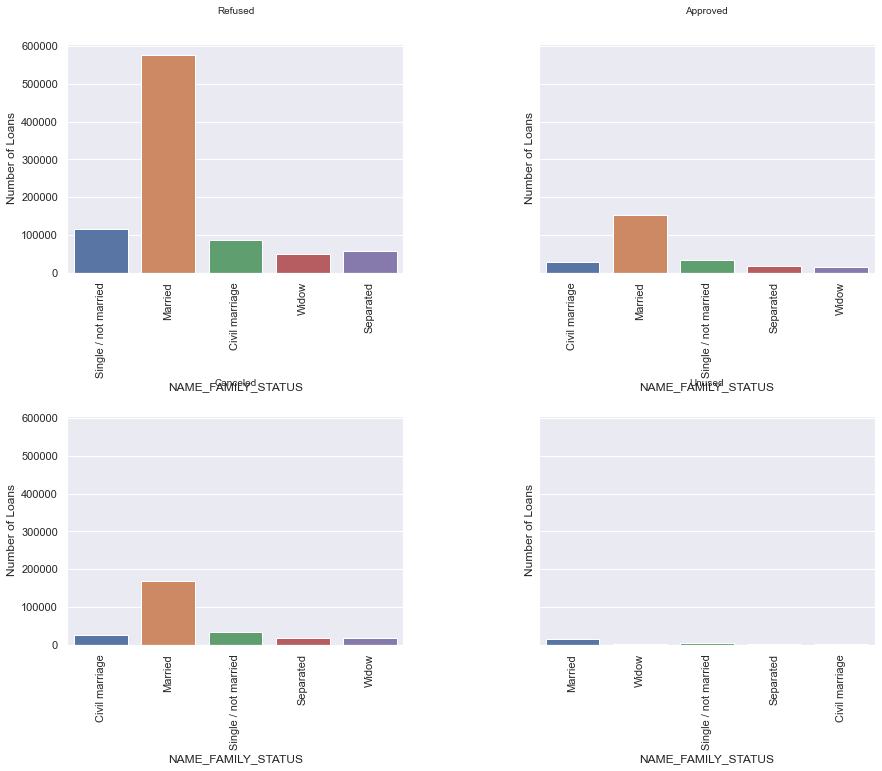

In [492]:
multi_plot('NAME_FAMILY_STATUS')

Here we can see that the Married people are applying and taking loans more than the others.

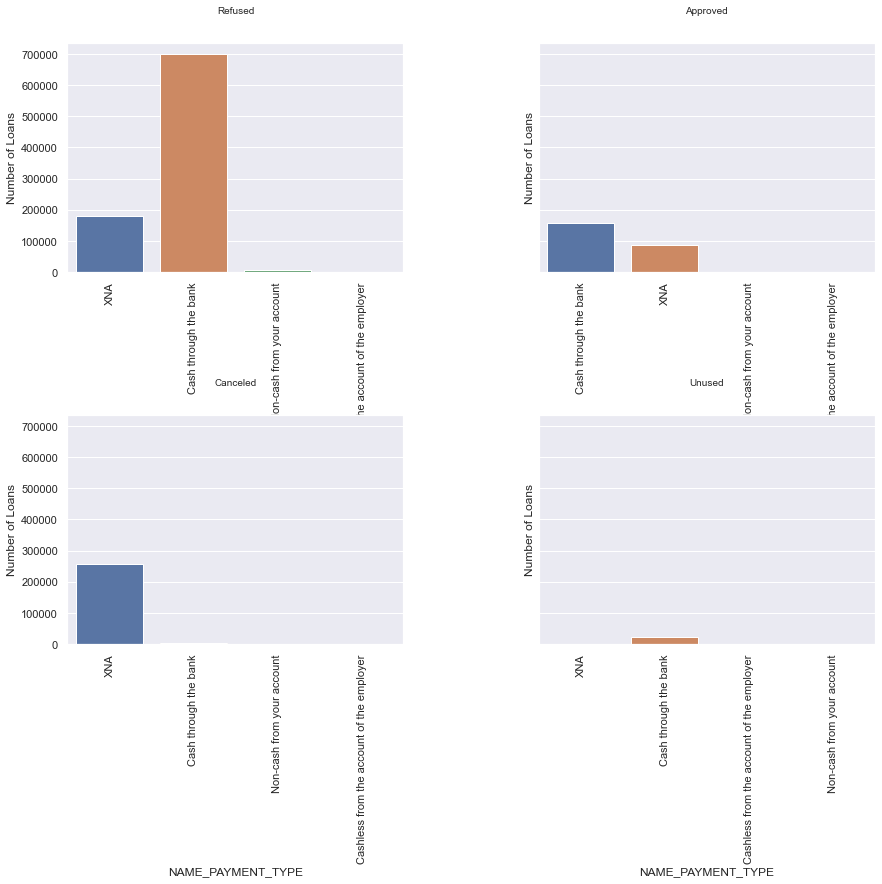

In [493]:
multi_plot('NAME_PAYMENT_TYPE')

Here we can see that the people are taking more loan in format of cash through the bank.

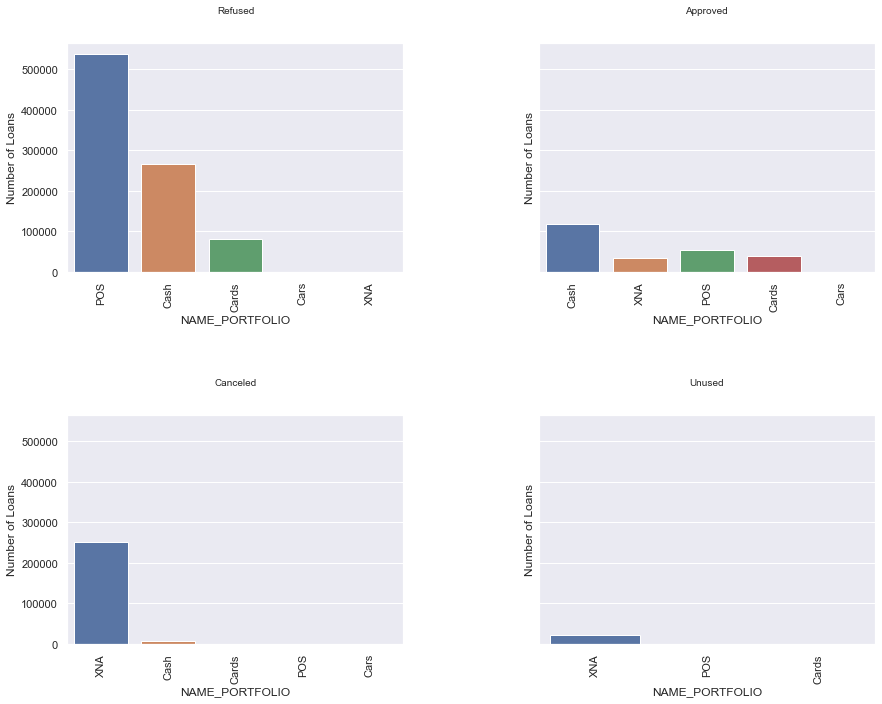

In [494]:
multi_plot('NAME_PORTFOLIO')

Here most approved loan were through POS and Most refused loans were in cash.

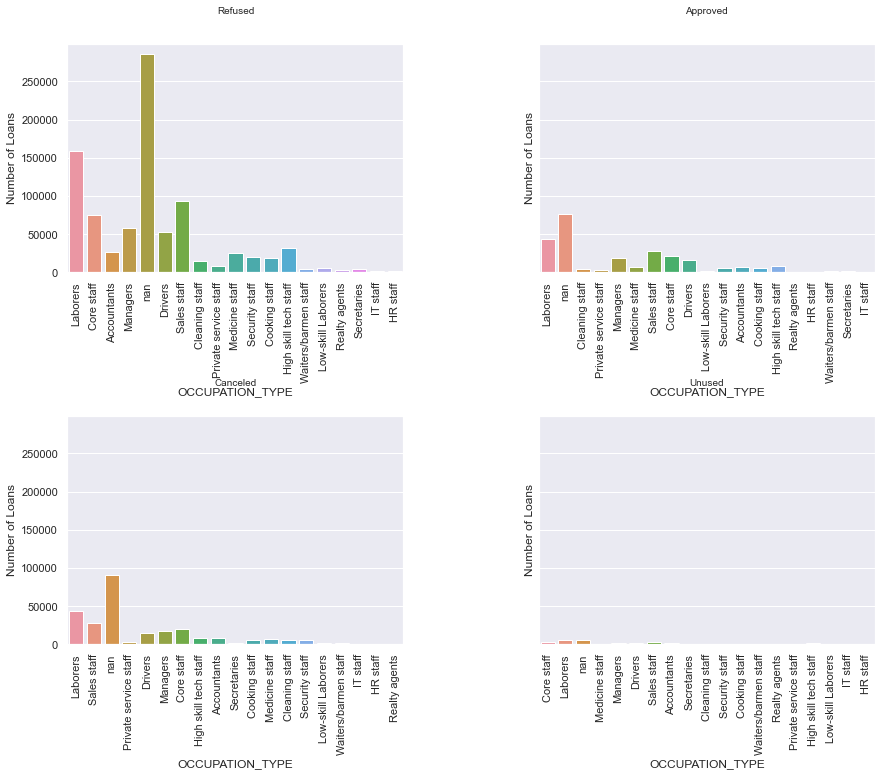

In [495]:
multi_plot('OCCUPATION_TYPE')

Here laborers are getting most refused and most approved loans. And aslo Sales staff is also getting the second most refused and approved loans.

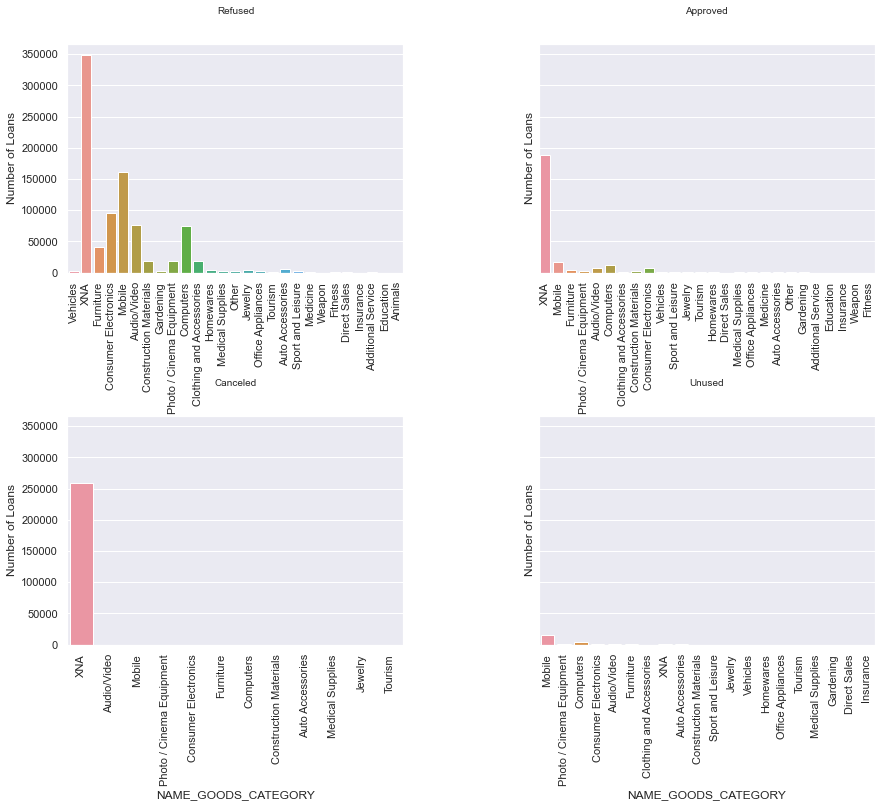

In [496]:
multi_plot('NAME_GOODS_CATEGORY')

Here Most Refused loan is of Mobile and most approved loan is Mobile.

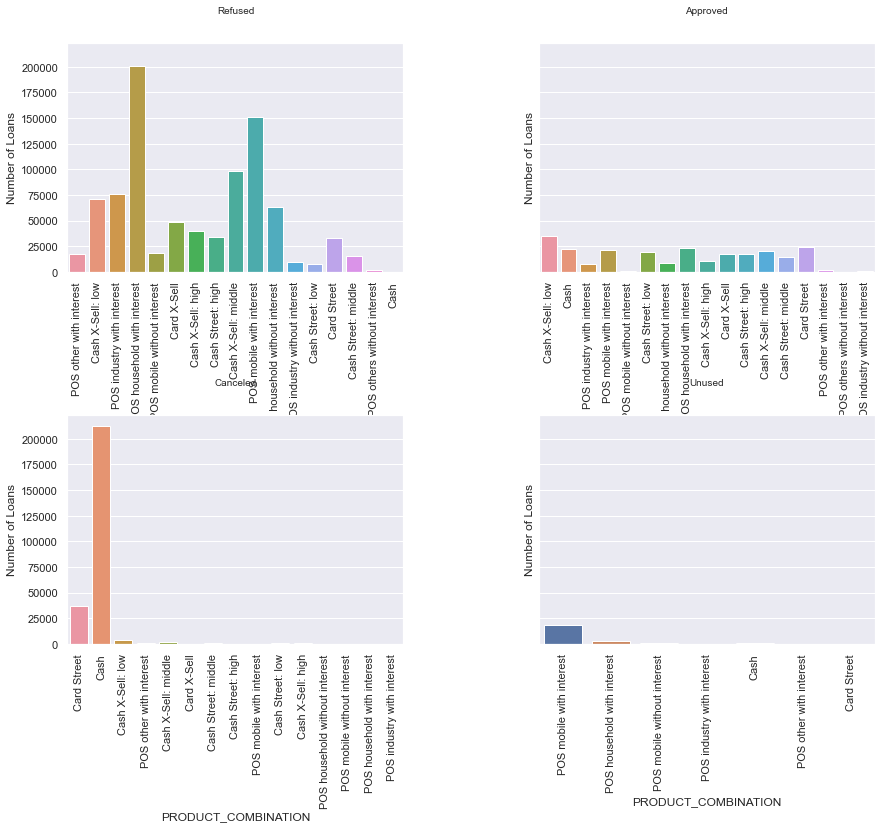

In [497]:
multi_plot('PRODUCT_COMBINATION')

The most accepting loan is Cash X-sell: low And most canceled loan is Cash and Most Unused loan is POS mobile with interest.

## Summary

--Here we were given two huge datasets namely new_application.csv and previous_application.csv.
  new_application.csv's shape was (307511, 122) while previous_application.csv's shape was (1670214, 37).
  Both needed data cleaning as they had a lot of null and NaN values.

--EDA for new_application: After performing eda on new_application data the following insights were discovered:
  1. Customers falling under Category: 1(Defaulters/Having payment difficulties) is about 8 percent and Customers falling under      Category : 0(Non-Defaulters) is about 92 percent. Also its ratio was 11.38:1.
  2. Females contribute 66.6% to the non-defaulters while 57.1% to the defaulters. We can conclude that we see more female          applying for loans than males and hence the more number of female defaulters as well. But the rate of defaulting of FEMALE      is much lower compared to their MALE counterparts.
  3. People with cars contribute 65.7% to the non-defaulters while 69.5% to the defaulters. We can conclude that While people        who have car default more often, the reason could be there are simply more people without cars Looking at the percentages      in both the charts, we can conclude that the rate of default of people having car is low compared to people who don't.
  4. Most of the loans are distributed to working class people We also see that working class people contribute 51% to non          defaulters while they contribute to 61% of the defaulters.
  5. Married people tends to apply for loans more often here. But single/non Married people also contribute 14.5% to Non            Defaulters and 18% to the defaulters. So there is more risk associated with them.
  6. People living with parents tend to default more often when compared with others.The reason could be their living expenses      are more as their parents are living with them.
  7. Almost all of the Education categories are equally likely to default except for the higher educated ones who are less          likely to default and secondary educated people are more likely to default.
  8. The 1st- tier people apply for loans very less also they tend to be more non-defaulters than defaulters.
  9. Income range from 100000 to 200000 is having more number of credits.
  10. For contract type ‘cash loans’ is having higher number of credits than ‘Revolving loans’ contract type.
  11. Larger families and people with larger AMT_CREDIT default less often.
  12. The higher amount installments dont have much much defaulters.
  13. The range of customers without payment of Academic degree is higher than the customer of with payment. And the rest of         the Education type is almost same for both the cases.
  14. The range of the customers without payment more as compare to the customers with payment.

-- EDA for previous_application: After performing eda on previous_application and all_data data the following insights were discovered:
   1. Most of the applications are for 'Cash loan' and 'Consumer loan'. Although the cash loans are refused more often than           others.
   2. Most of the clients chose to repay the loan using the 'Cash through the bank' option We can also see that 'Non-Cash from       your account' & 'Cashless from the account of the employee' options are not at all popular in terms of loan repayment           amongst the customers.
   3. Most of the loan applications are from repeat customers, out of the total applications 70% of customers are repeaters.
   4. Car ownership doesn't have any effect on application approval or rejection. But we saw earlier that the people who has a       car has lesser chances of default. The bank can add more weightage to car ownership while approving a loan amount.
   5. Code gender doesn't have any effect on application approval or rejection. But we saw earlier that female have lesser           chances of default compared to males. The bank can add more weightage to female while approving a loan amount.
   6. People who were approved for a loan earlier, defaulted less often where as people who were refused a loan earlier have         higher chances of defaulting.
   7. The Revolving loan is much more acceptable as compare to the cash and consumer loans.